# Case Study steps that will be following
### 1. Understanding the Data
### 2. Importing the required packages
### 3. Data explore and cleaning
### 4. Univariate Analysis
### 5. Segmented Univariate Analysis
### 6. Bivariate Analysis
### 7. Draw Conclusion
### 8. Documentation and Presentation

## Data Understanding
> The case study is prepared for a Financial Institution called "Lending Club" based in USA which provides loan to the end consumers. As it always happens in most lending institution, Many are good loans whereas some are the bad loans. Few people tends to default their loan and not make timely payment or no payment at all to the organization. 

> This Case study is being prepared by putting ownself on the shoes of the person who is responsible for the approval and disbursement of the loan to the consumer. When a consumers comes and asks for a loan, we need to analyse past data and decide accordingly whether the person will be willing to pay back the loan in the future.

> We should also not decline all the loan as it may cause the loss of business whereas accepting all the loans will increase probability of having more number of defaulters. To make the decision more accurate and precise, we will be analysing almost 40000 rows and 111 columns of the data.

> All the rows and columns will not be required and also may result in irrelevancy in the decision, thus, we will find out such data and remove them accordingly.

In [1]:
# Importing all necessary python libraries for calculations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# fath for the csv file,
data_path = 'loan.csv'

# Adding low memory option for reading data, as sometimes in heavy data it might create issue
data = pd.read_csv(data_path, low_memory = False)

date_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


In [3]:
# check for some head data
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
## Unable to preview all the column so changing the setting of of the pandas to view all the columns
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

In [5]:
# check for some tail data
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
# check for shape of the data object
data.shape

(39717, 111)

In [7]:
# check for the null values in the columns
data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


## We can see that there are many columns with all null values so removing them

In [8]:
# drop all the columns with the null values
data.dropna(axis = 1, how = 'all', inplace = True)

In [9]:
# recheck for the shape
data.shape

(39717, 57)

In [10]:
# recheck for the head values
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
# looking for the unique values count to know the further useless columns
data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

### Most of the null data columns have been removed but still there are some columns that cannot come of any use in the case study,thus removing it.
> Columns to be removed are: `tax_liens`, `delinq_amnt`, `chargeoff_within_12_mths`, `acc_now_delinq`, `application_type`, `policy_code`, `collections_12_mths_ex_med`, `pymnt_plan`, `initial_list_status`, `pub_rec_bankruptcies` 

In [12]:
# removing the columns and printing head
data.drop(["tax_liens", "delinq_amnt", "chargeoff_within_12_mths", "acc_now_delinq", "application_type", "policy_code", "collections_12_mths_ex_med", "pymnt_plan", "initial_list_status", "pub_rec_bankruptcies" ], axis = 1, inplace = True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16


In [13]:
# getting the new shape of the data
data.shape

(39717, 47)

In [14]:
# Looking for the most unique value in the data to make one primary key and also removing other non-required columns
data.nunique().sort_values(ascending=False)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
desc                       26527
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
mths_since_last_record       111
last_credit_pull_d           106
last_pymnt_d                 101
mths_since

In [15]:
# In the data frame, ID, URL and Member ID are unique to all the borrower thus, removing those fields
data.drop(['id','member_id', 'url'], axis=1, inplace=True)

### Columns like 'emp_title', 'title', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'total_rec_late_fee', 'out_prncp', 'out_prncp_inv', 'last_credit_pull_d', 'collection_recovery_fee', 'last_pymnt_d' are of no use to predict loan disbursement for future business

In [16]:
# removing other non required column for analysis for future borrowers
data.drop(['emp_title', 'title', 'total_rec_prncp','desc', 'total_rec_int', 'recoveries', 'total_rec_late_fee', 'out_prncp', 'out_prncp_inv', 'last_credit_pull_d', 'collection_recovery_fee', 'last_pymnt_d', 'mths_since_last_delinq', 'desc', 'mths_since_last_record', 'next_pymnt_d'], axis=1, inplace=True)

In [17]:
# finding shape after removing columns
data.shape

(39717, 29)

In [18]:
# Listing all the columns after removal or unnecessary columns
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'last_pymnt_amnt'],
      dtype='object')

In [19]:
# Finding % of null values in the columns given
data_null_percentage = round(100*(data.isnull().sum()/len(data.index)), 2)
data_null_percentage[ data_null_percentage > 0 ]

emp_length    2.71
revol_util    0.13
dtype: float64

## Handle the missing values
> emp_length and revol_util has some missing values, thus need to fix those
##### Finding the mode data and replacing the missing values with the mode for both `emp_length` and `revol_util`

In [20]:
print(data.emp_length.mode()[0])
data.emp_length.value_counts()

10+ years


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [21]:
print(data.revol_util.mode()[0])
data.revol_util.value_counts()

0%


0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

In [22]:
# Replacing the mode value and printing emp_length for surity
data.emp_length.fillna(data.emp_length.mode()[0], inplace = True)
data.emp_length.isna().sum()

0

In [23]:
# Replacing the mode value and printing revol_util for surity
data.revol_util.fillna(data.revol_util.mode()[0], inplace = True)
data.revol_util.isna().sum()

0

### As per the requirement, we need to predict data for future loans, thus, the active loans data are not required and filtering them out.

In [24]:
#Removing all the rows with current as loan loan
data = data[data.loan_status != 'Current']

In [25]:
# Getting the shape of the data
data.shape

(38577, 29)

In [26]:
# FIndinf the loan term unique data
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [27]:
# trimming the data to remove the blank white space at the beginning
data['term'] = data.term.str.strip()

## Converting the cleaning data type for easier representation

In [28]:
# Getting the Info of the columns of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           38577 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  zip_code             38577 non-null 

In [29]:
data.int_rate.value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [30]:
data.revol_util.value_counts()

0%        1004
0.20%       62
63%         62
40.70%      57
31.20%      57
          ... 
77.63%       1
25.74%       1
0.83%        1
47.36%       1
7.28%        1
Name: revol_util, Length: 1088, dtype: int64

#### We can find out that int_rate and revol_util are all the percentage value but because of % symbol it is read as object. Converting them to string for better data calculations

In [31]:
data.int_rate = pd.to_numeric(data.int_rate.apply(lambda x : x.split('%')[0]))
data.revol_util = pd.to_numeric(data.revol_util.apply(lambda x : x.split('%')[0]))

In [32]:
#Again checking for the columns info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  float64
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           38577 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  zip_code             38577 non-null 

In [33]:
# Looking at the head and tail data for confirmation and data visualization
data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,5863.155187,5833.84,171.62
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,1008.710000,1008.71,119.66
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,3005.666844,3005.67,649.91
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,12231.890000,12231.89,357.48
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,5632.210000,5632.21,161.03


In [34]:
data.tail(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt
39712,2500,2500,1075.0,36 months,8.07,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.1,40,2822.969293,1213.88,80.90
39713,8500,8500,875.0,36 months,10.28,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.9,9,9913.491822,1020.51,281.94
39714,5000,5000,1325.0,36 months,8.07,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.4,20,5272.161128,1397.12,0.00
39715,5000,5000,650.0,36 months,7.43,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.7,26,5174.198551,672.66,0.00
39716,7500,7500,800.0,36 months,13.75,255.43,E,E2,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,debt_consolidation,027xx,MA,14.29,1,Oct-03,0,7,0,4175,51.5,8,9195.263334,980.83,256.59


#### issue_d and earliest_cr_line are the date columns but stored as Object type, thus, converting it to date type


In [35]:
#convert date object to date type

#For earliest Cr Line
data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2022 else x)

# For Issue Date
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2022 else x)

In [36]:
#rechecking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38577 non-null  int64         
 1   funded_amnt          38577 non-null  int64         
 2   funded_amnt_inv      38577 non-null  float64       
 3   term                 38577 non-null  object        
 4   int_rate             38577 non-null  float64       
 5   installment          38577 non-null  float64       
 6   grade                38577 non-null  object        
 7   sub_grade            38577 non-null  object        
 8   emp_length           38577 non-null  object        
 9   home_ownership       38577 non-null  object        
 10  annual_inc           38577 non-null  float64       
 11  verification_status  38577 non-null  object        
 12  issue_d              38577 non-null  datetime64[ns]
 13  loan_status          38577 non-

## Deriving Variables from existing data

In [37]:
# Adding new columns for month and year for both issue_d and earliest_cr_line column
#issue_d column
data['issue_d_year'] = data.issue_d.dt.year.astype(object)
data['issue_d_month'] = data.issue_d.dt.strftime('%b')

#earliest_cr_line
data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year.astype(object)
data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')

In [38]:
# Checking head values for data lookup
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,5863.155187,5833.84,171.62,2011,Dec,1985,Jan
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,1008.710000,1008.71,119.66,2011,Dec,1999,Apr
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,3005.666844,3005.67,649.91,2011,Dec,2001,Nov
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,12231.890000,12231.89,357.48,2011,Dec,1996,Feb
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,5632.210000,5632.21,161.03,2011,Dec,2004,Nov


In [39]:
data.shape

(38577, 33)

#### In the given problem statement, numerical data of an individual can impact a lot, thus, removig the outliers if any.

<AxesSubplot:xlabel='annual_inc'>

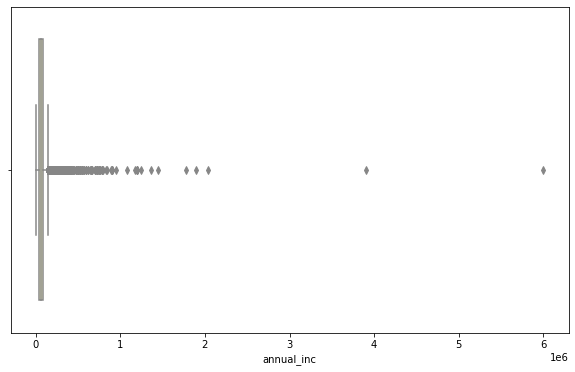

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['annual_inc'], palette="Spectral")

<AxesSubplot:xlabel='loan_amnt'>

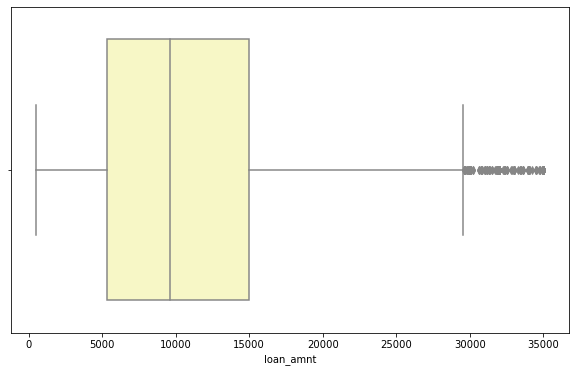

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['loan_amnt'], palette="Spectral")

<AxesSubplot:xlabel='funded_amnt'>

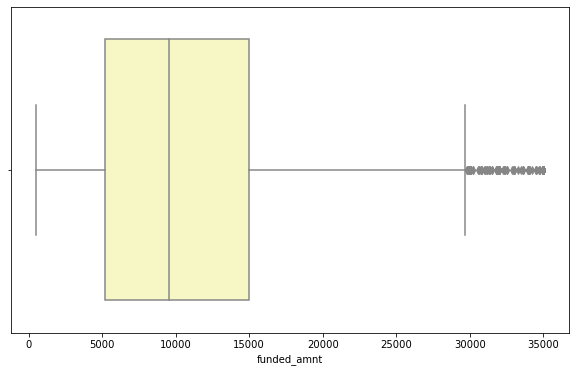

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['funded_amnt'], palette="Spectral")

<AxesSubplot:xlabel='funded_amnt_inv'>

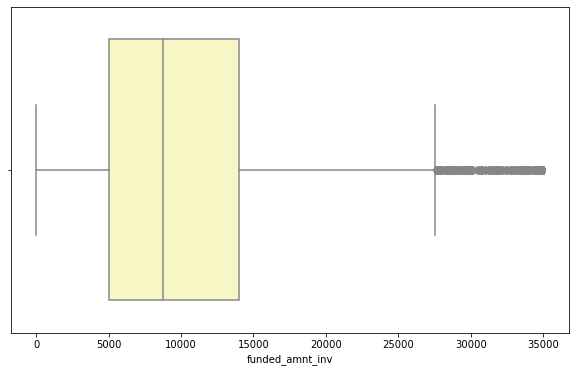

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['funded_amnt_inv'], palette="Spectral")

<AxesSubplot:xlabel='dti'>

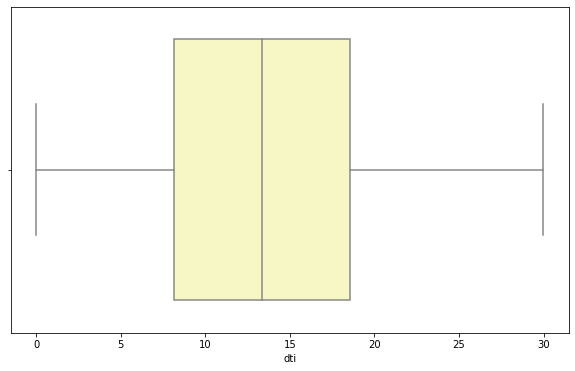

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['dti'], palette="Spectral")

In [45]:
# We can clearly see the outlier in annual_inc field, thus analyzing the outlier by percentile and remove them
annual_imcome_percentile = data['annual_inc'].quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.98, 0.99, 1])
annual_imcome_percentile

0.25      40000.0
0.50      58868.0
0.75      82000.0
0.90     115000.0
0.95     140004.0
0.98     187000.0
0.99     234144.0
1.00    6000000.0
Name: annual_inc, dtype: float64

In [46]:
# Picking up the 95th percentile and removing outliers above them. 
data = data[data['annual_inc'] <= data['annual_inc'].quantile(0.95)]

<AxesSubplot:xlabel='annual_inc'>

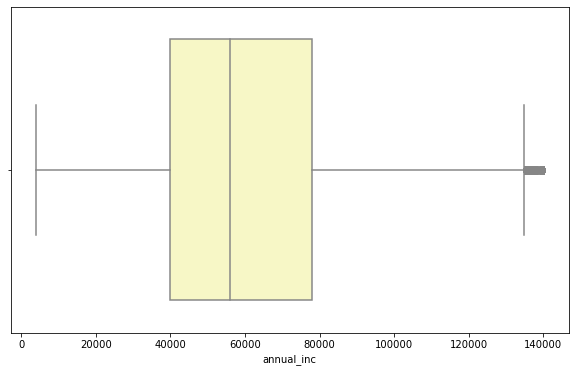

In [47]:
#Checking for the box plot of the annual income.
plt.figure(figsize=(10,6))
sns.boxplot(x=data['annual_inc'], palette="Spectral")

#### No outliers can be seen in the annual_inc column now.
## Now we can continue with the data analysis by checking loan_status first

## Univariate Ananlysis

#### Loan Status

<AxesSubplot:xlabel='loan_status', ylabel='count'>

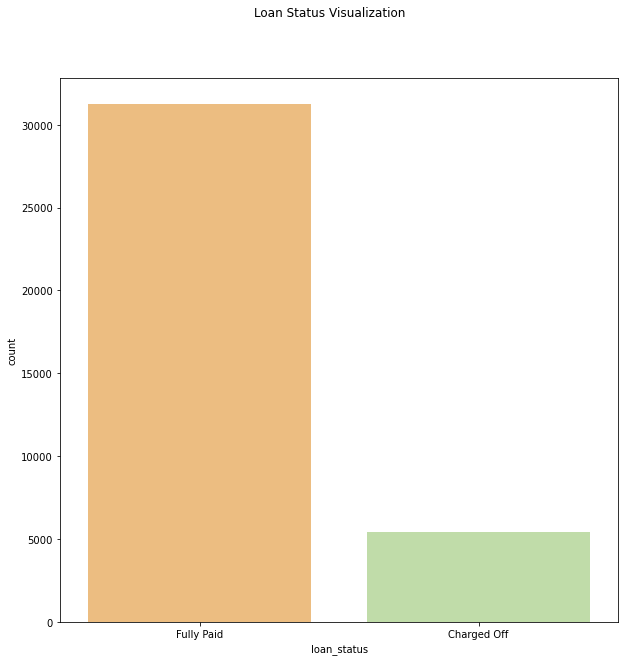

In [48]:
plt.figure(figsize=(10,10))
plt.suptitle('Loan Status Visualization')
sns.countplot(data = data, x = 'loan_status', palette="Spectral")

In [49]:
data['loan_status'].value_counts(normalize=True).mul(100).astype(str)+'%'

Fully Paid      85.21853003764936%
Charged Off    14.781469962350629%
Name: loan_status, dtype: object

> Conclusion: 
> 1. Almost 15% of the people defaults the loan whereas 85% people pay them on time.


#### Loan Amount

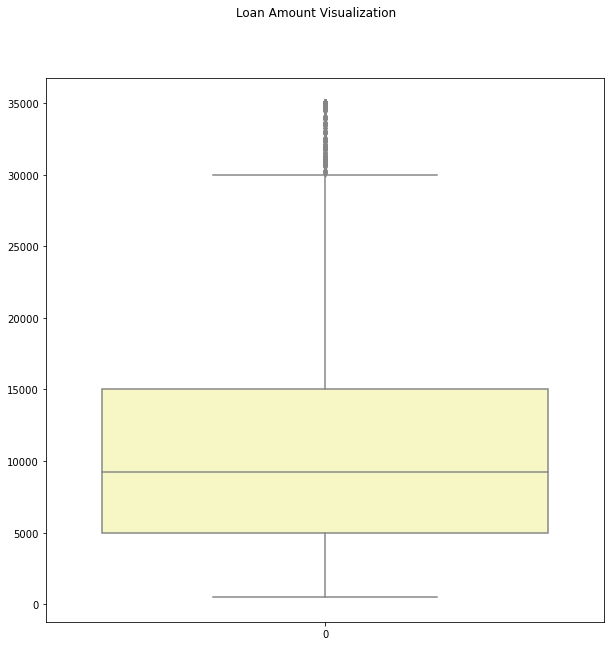

In [50]:
plt.figure(figsize=(10,10))
plt.suptitle('Loan Amount Visualization')
sns.boxplot(data=data['loan_amnt'], palette="Spectral")
plt.show()

In [51]:
data['loan_amnt'].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 1])

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
90%      20000.000000
100%     35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

> Conclusion: 
> 1. On an average a person takes a loan of around 10 grand.
> 2. Minimum of 500 and max upto 35 grands loan are provided

### funded_amnt

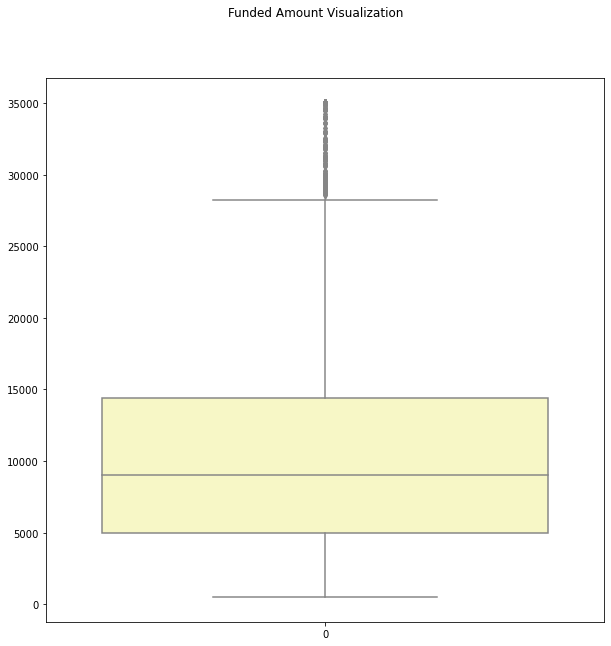

In [52]:
plt.figure(figsize=(10,10))
plt.suptitle('Funded Amount Visualization')
sns.boxplot(data=data['funded_amnt'], palette="Spectral")
plt.show()

In [53]:
data['funded_amnt'].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 1])

count    36654.000000
mean     10436.144077
std       6800.636737
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
90%      20000.000000
100%     35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

> Conclusion: 
> 1. The data of the funded_amt is very close or similar to loan amount.
> 2. It shows that the loan amount and funcded amount for an individual is very similar

### funded_amnt_inv

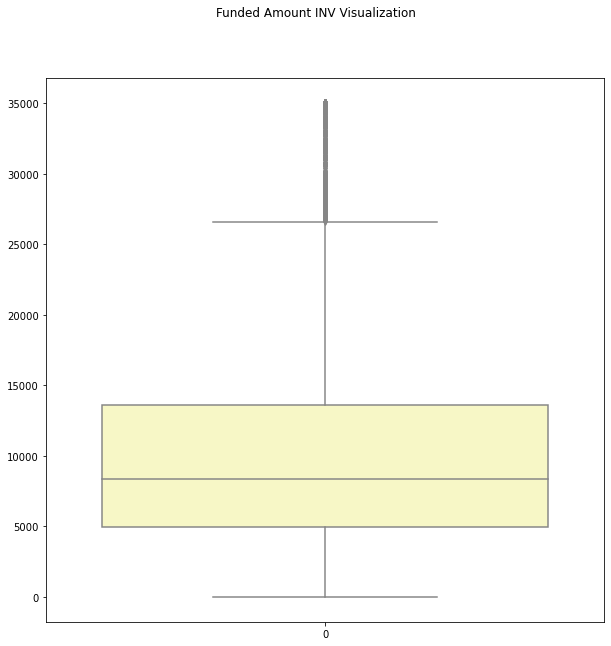

In [54]:
plt.figure(figsize=(10,10))
plt.suptitle('Funded Amount INV Visualization')
sns.boxplot(data=data['funded_amnt_inv'], palette="Spectral")
plt.show()

In [55]:
data['funded_amnt_inv'].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 1])

count    36654.000000
mean      9894.181349
std       6730.756232
min          0.000000
25%       4975.000000
50%       8375.000000
75%      13623.731415
90%      19750.000000
100%     35000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

> Conclusion: 
> 1. The data shows that the actual funded inv amount is a bit lesser than that of the funded amount.

### Interest Rate

<Figure size 720x720 with 0 Axes>

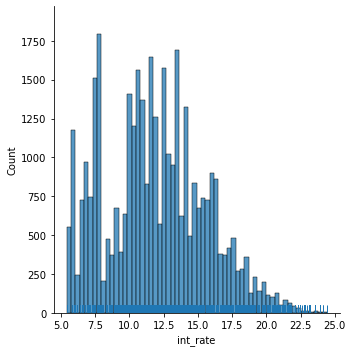

In [56]:
plt.figure(figsize=(10,10))
plt.suptitle('Annual income distribution')

sns.displot(data['int_rate'], rug=True, palette="Spectral")


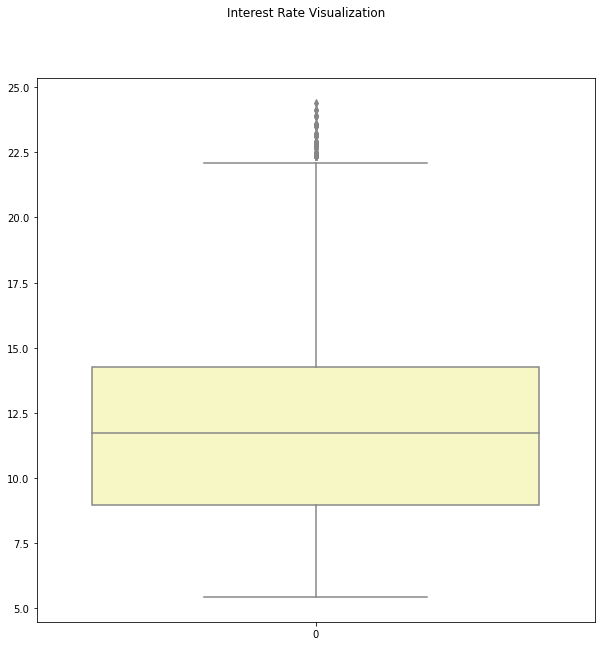

In [57]:
plt.figure(figsize=(10,10))
plt.suptitle('Interest Rate Visualization')
sns.boxplot(data=data['int_rate'], palette="Spectral")
plt.show()

In [58]:
data['int_rate'].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 1])

count    36654.000000
mean        11.888080
std          3.667257
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
90%         16.770000
100%        24.400000
max         24.400000
Name: int_rate, dtype: float64

> Conclusion: 
> 1. The data shows that the average rate of interest is around 12%.
> 2. People get loan at minimum of 5.5% and at max of 24% as well

### Annual Income

<Figure size 720x720 with 0 Axes>

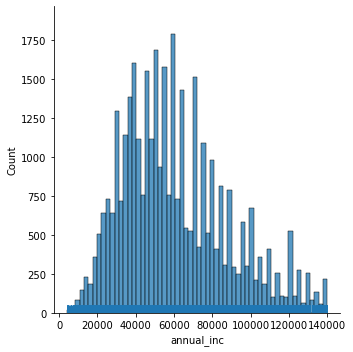

In [59]:
plt.figure(figsize=(10,10))
plt.suptitle('Annual income Visualization')
sns.displot(data['annual_inc'], rug=True, palette="Spectral")

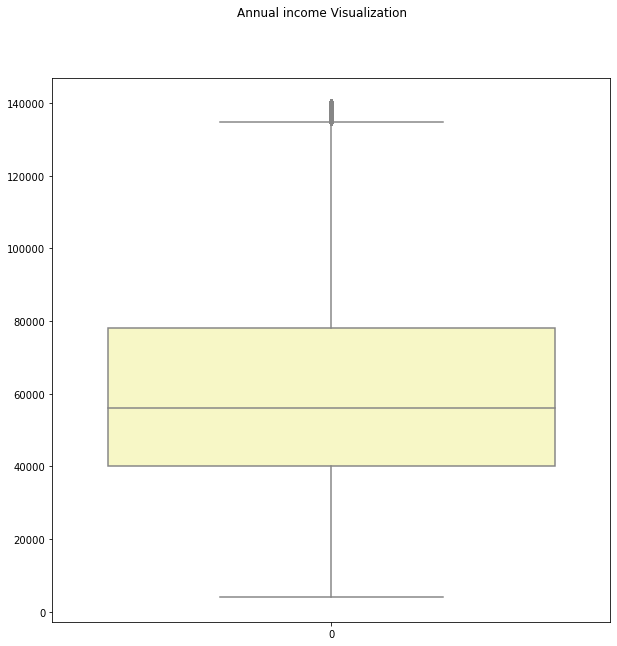

In [60]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data['annual_inc'], palette="Spectral")
plt.suptitle('Annual income Visualization')
plt.show()

In [61]:
data['annual_inc'].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 1])

count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
90%      100000.000000
100%     140004.000000
max      140004.000000
Name: annual_inc, dtype: float64

> Conclusion: 
> 1. The data shows that in average a borrower's annual income is around 60k.
> 2. Some people even have a minimum income of 4k whereas maximum upto 140k after removing outliers

### Home Ownership

In [62]:
# Looking up for the unique values in the home ownership of the users
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [63]:
data['home_ownership'].value_counts()

RENT        18031
MORTGAGE    15675
OWN          2852
OTHER          93
NONE            3
Name: home_ownership, dtype: int64

In [64]:
# Since there are only 3 None data in the column, we will change that to a near matching value Other.
data['home_ownership'].replace(value='OTHER', to_replace = ['NONE'],inplace = True)

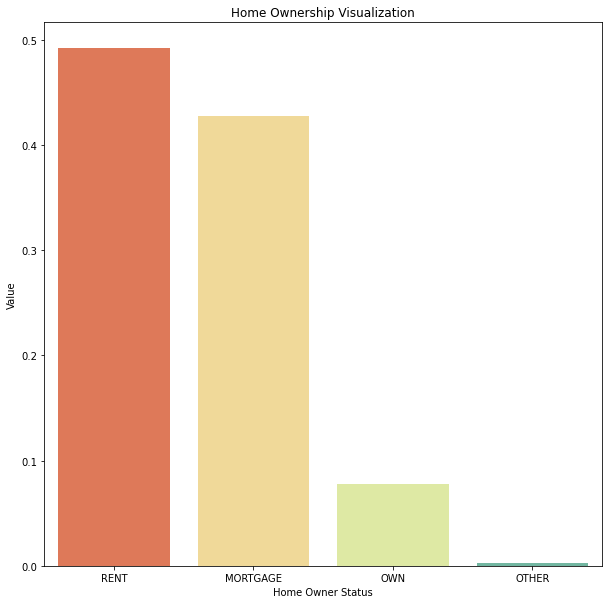

In [65]:
plt.figure(figsize=(10,10))
sns.barplot(x='index', y='home_ownership', data=data['home_ownership'].value_counts(normalize=True).reset_index(), palette="Spectral")
plt.xlabel('Home Owner Status')
plt.ylabel('Value')
plt.title('Home Ownership Visualization')
plt.show()

> Conclusion: 
> 1. The data shows that most of the borrower either live in a rented home or have their house mortgaged.
> 2. People's who have their own home, tends not to take much loan in comparison

### DTI

<Figure size 720x720 with 0 Axes>

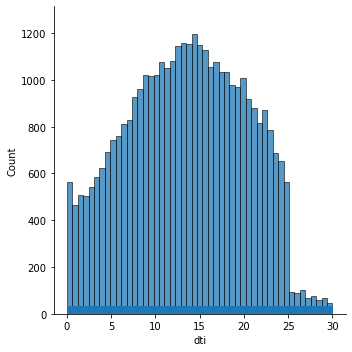

In [66]:
plt.figure(figsize=(10,10))
plt.suptitle('DTI Visualization')
sns.displot(data['dti'], rug=True, palette="Spectral")

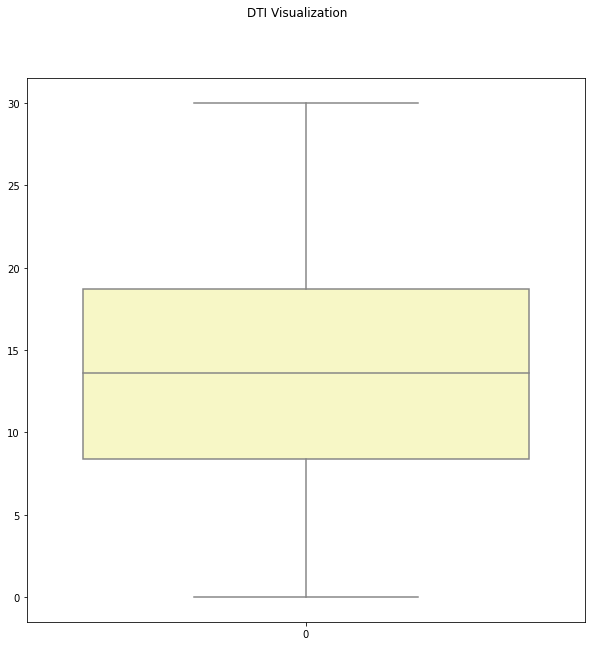

In [67]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data['dti'], palette="Spectral")
plt.suptitle('DTI Visualization')
plt.show()

> Conclusion: 
> 1. The DTI is always less than 30% and also the mean of the data is just ~15%, which is always good signal to borrow.

### Pub Rec Records

Text(0.5, 1.0, 'Pub Rec Visualization')

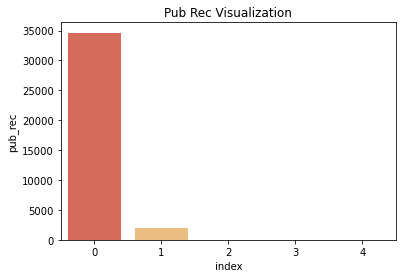

In [68]:
sns.barplot(x='index', y='pub_rec', data=data['pub_rec'].value_counts().reset_index(), palette="Spectral")
plt.title('Pub Rec Visualization')

> Conclusion: 
> 1. More than 92% of the users does not have any Pub rec record

### Analyzing year and month of loan disbursement

Text(0.5, 1.0, 'Issue Month Distribution')

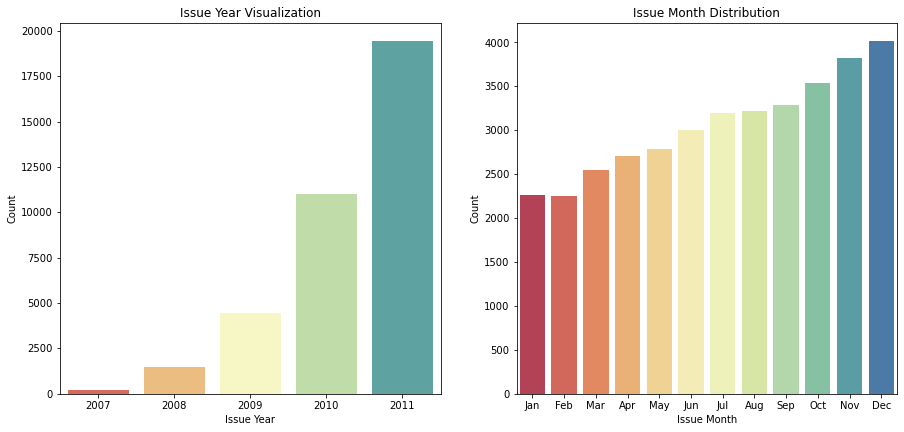

In [69]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.barplot(x='index', y='issue_d_year', data=data['issue_d_year'].value_counts().reset_index(), palette="Spectral")
plt.xlabel('Issue Year')
plt.ylabel('Count')
plt.title('Issue Year Visualization')

plt.subplot(2,2,2)
sns.barplot(x='index', y='issue_d_month',order=date_order, data=data['issue_d_month'].value_counts().reset_index(), palette="Spectral")
plt.xlabel('Issue Month')
plt.ylabel('Count')
plt.title('Issue Month Distribution')



> Conclusion: 
> 1. Most of the loan is provided in the year 2011, whereas the company have almost doubled the number of loans every single year from 2007
> 2. Most of the loan is provided in the end months of the year compared to the year starting

### Analyzing year and month of Credit Line Check

Text(0.5, 1.0, 'Cr Line Year Visualization')

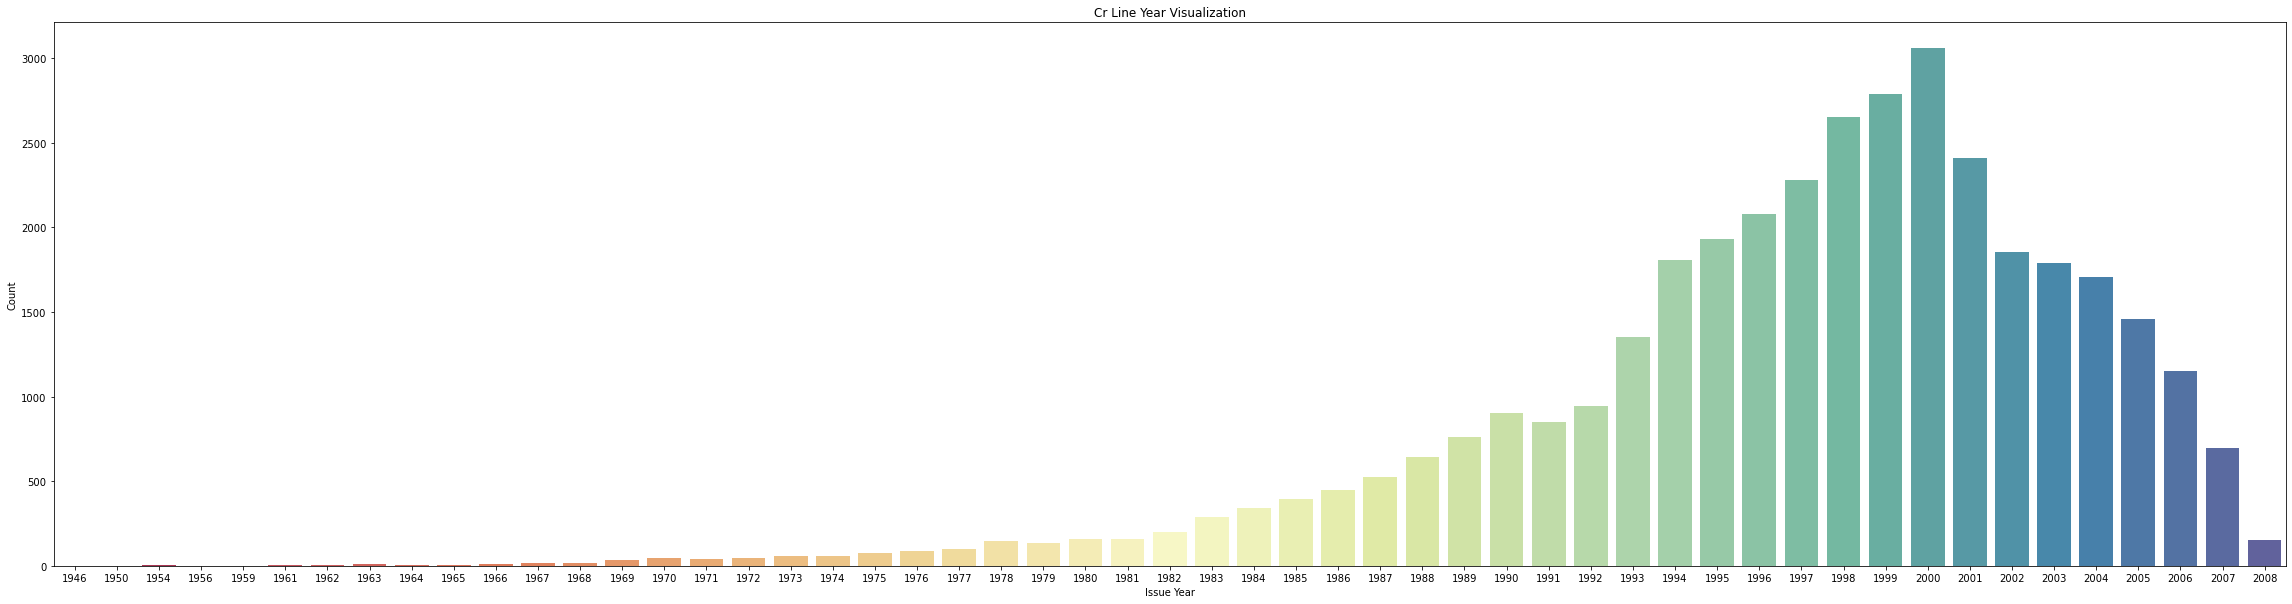

In [70]:
plt.figure(figsize=(40,10))
sns.barplot(x='index', y='earliest_cr_line_year', data=data['earliest_cr_line_year'].value_counts().reset_index(), palette="Spectral")
plt.xlabel('Issue Year')
plt.ylabel('Count')
plt.title('Cr Line Year Visualization')

Text(0.5, 1.0, 'Cr Line Month Distribution')

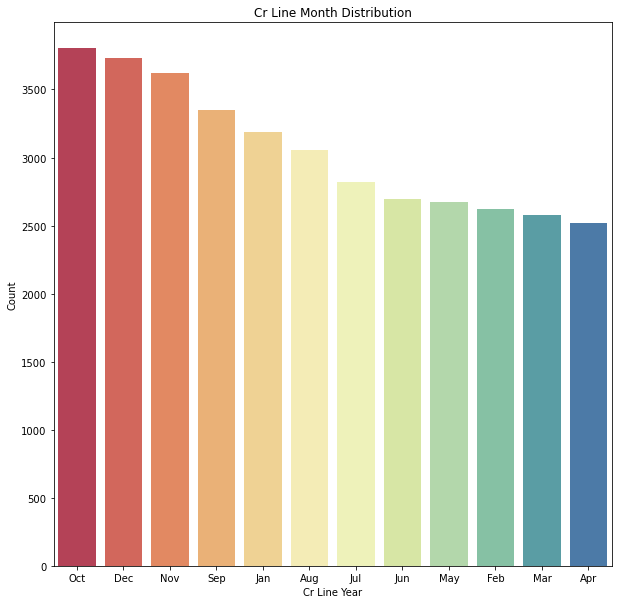

In [71]:
plt.figure(figsize=(10,10))
sns.barplot(x='index', y='earliest_cr_line_month', data=data['earliest_cr_line_month'].value_counts().reset_index(), palette="Spectral")
plt.xlabel('Cr Line Year')
plt.ylabel('Count')
plt.title('Cr Line Month Distribution')


In [72]:
data['earliest_cr_line_month'].describe()

count     36654
unique       12
top         Oct
freq       3804
Name: earliest_cr_line_month, dtype: object

In [73]:
data['earliest_cr_line_year'].describe()

count     36654
unique       53
top        2000
freq       3059
Name: earliest_cr_line_year, dtype: int64

> Conclusion: 
> 1. The most earlier CR line checks have been made on year 2000
> 2. The most of the Cr line checks have been performed on the month of october

### Grade ans Sub grade of the loan

Text(0.5, 1.0, 'Grade Visualization')

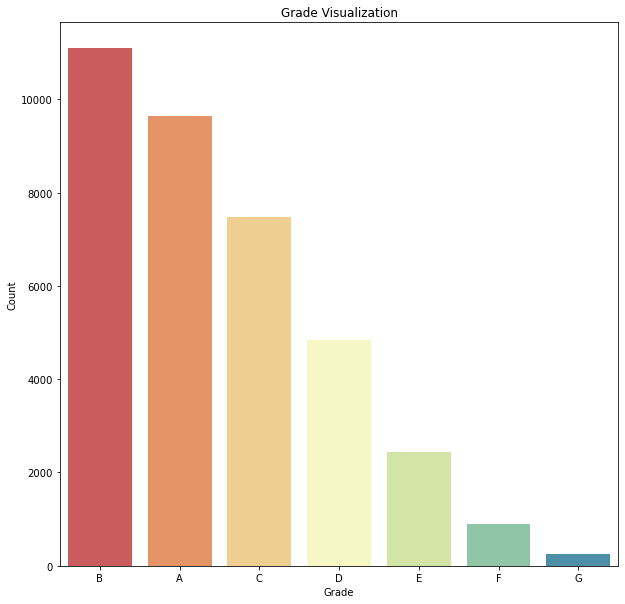

In [74]:
plt.figure(figsize=(10,10))
sns.barplot(x='index', y='grade', data=data['grade'].value_counts().reset_index(), palette="Spectral")
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Visualization')

Text(0.5, 1.0, 'Sub Grade Visualization')

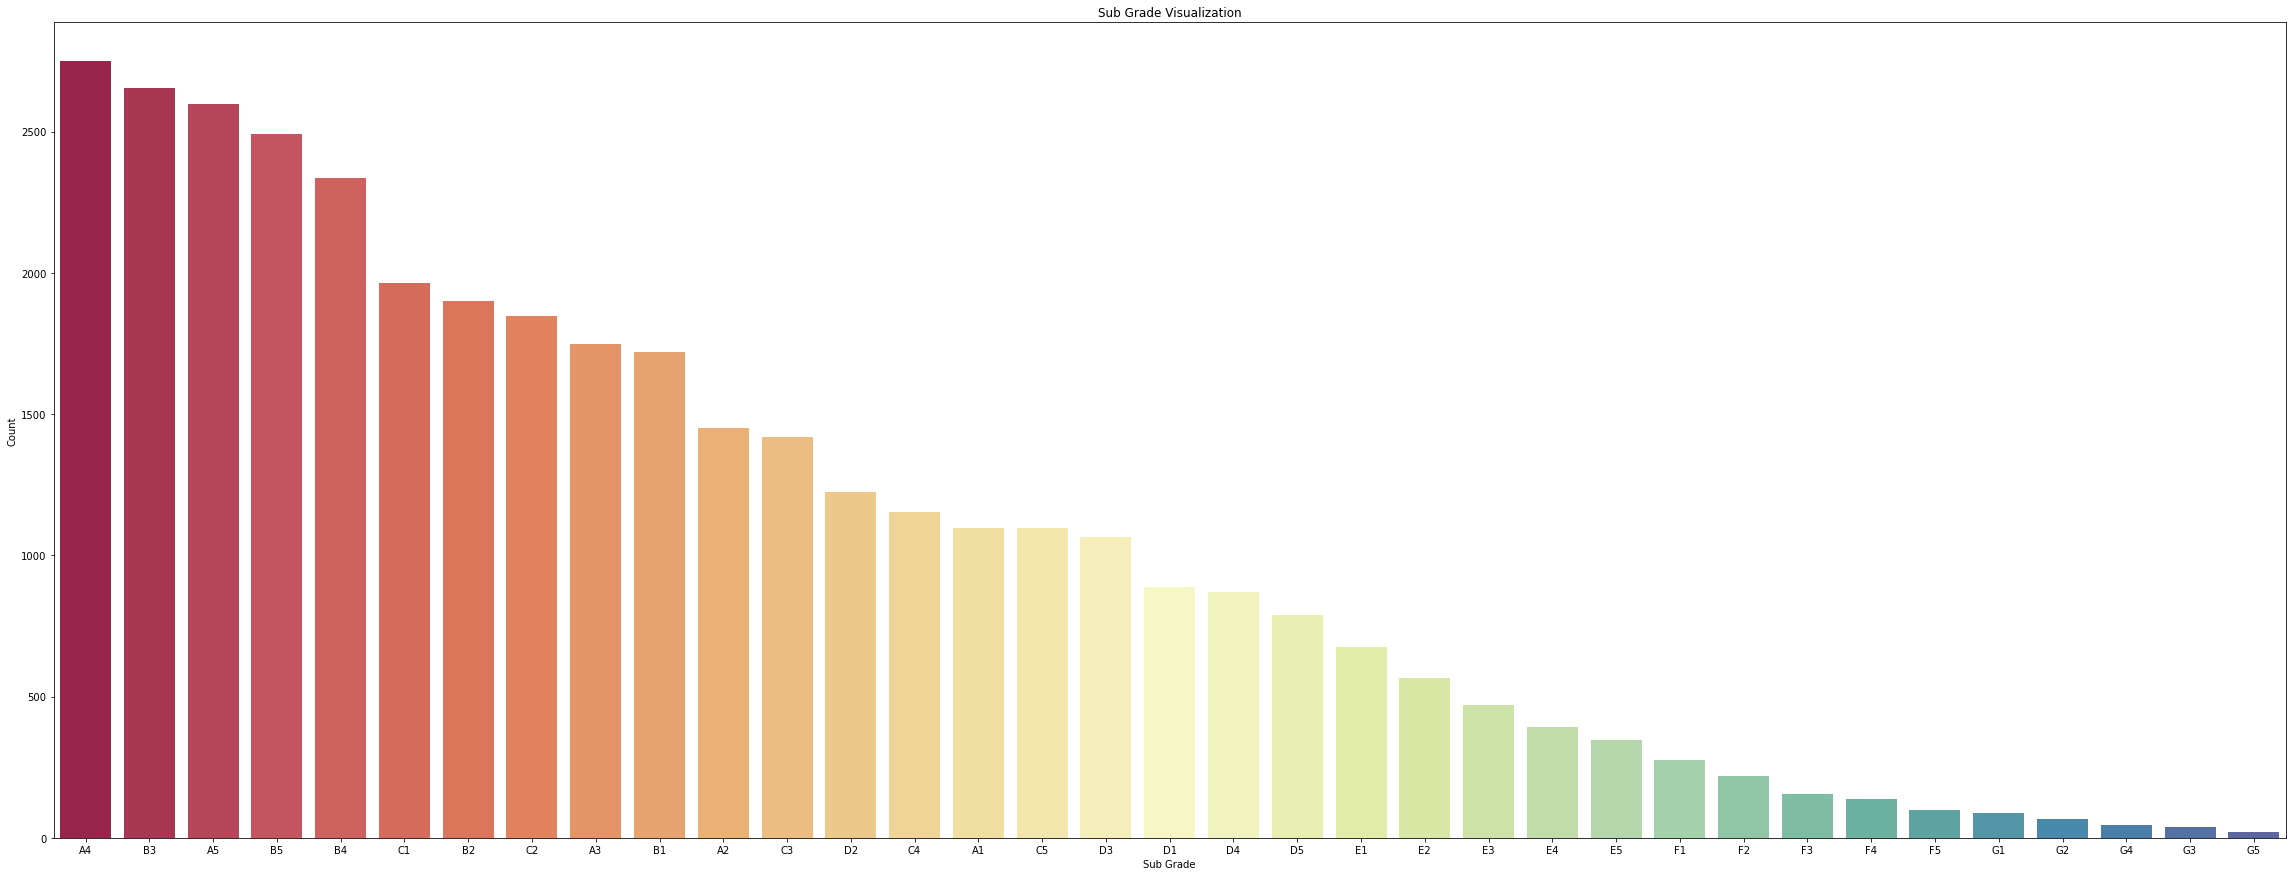

In [75]:
plt.figure(figsize=(40,15))
sns.barplot(x='index', y='sub_grade', data=data['sub_grade'].value_counts().reset_index(), palette="Spectral")
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.title('Sub Grade Visualization')

> Conclusion: 
> 1. Most of the borrowers fall under Grade A, B and C
> 2. The most subgrade between borrowers is A4, B3, A5 and B5

### Term of the loan

Text(0.5, 1.0, 'Term Visualization')

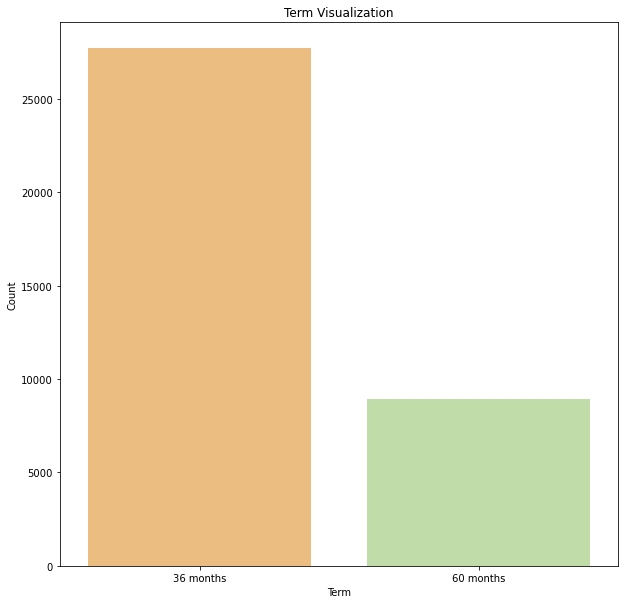

In [76]:
plt.figure(figsize=(10,10))
sns.barplot(x='index', y='term', data=data['term'].value_counts().reset_index(), palette="Spectral")
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Term Visualization')

In [77]:
data['term'].value_counts(normalize=True).mul(100).astype(str)+'%'

36 months    75.62885360397227%
60 months    24.37114639602772%
Name: term, dtype: object

> Conclusion: 
> 1. Only 1/4 th of the people tends to take loan for a term of 60 months, rest take loan for 36 month

### Installment amount

<Figure size 720x720 with 0 Axes>

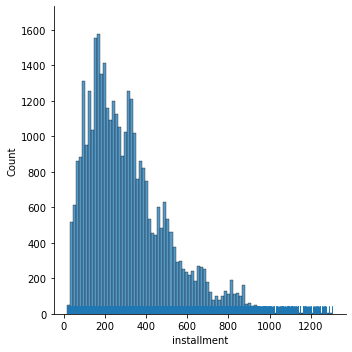

In [78]:
plt.figure(figsize=(10,10))
plt.suptitle('Installment')
sns.displot(data['installment'], rug=True, palette="Spectral")

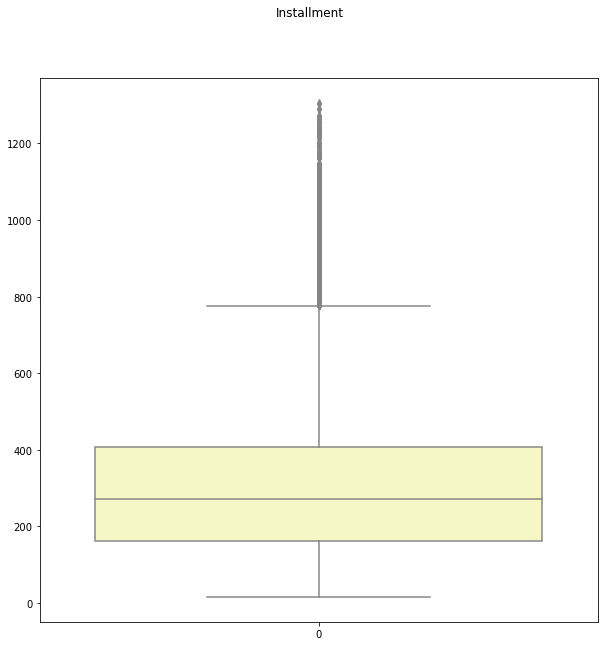

In [79]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data['installment'], palette="Spectral")
plt.suptitle('Installment')
plt.show()

In [80]:
data['installment'].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 1])

count    36654.000000
mean       311.888682
std        199.230096
min         15.690000
25%        163.080000
50%        270.420000
75%        408.480000
90%        588.990000
100%      1305.190000
max       1305.190000
Name: installment, dtype: float64

> Conclusion: 
> 1. Most people have montly installment of an average ~300 whereas some pay as less as 15 whereas some pay upto ~1300

### Loan Verification status

Text(0.5, 1.0, 'Verification Status Visualization')

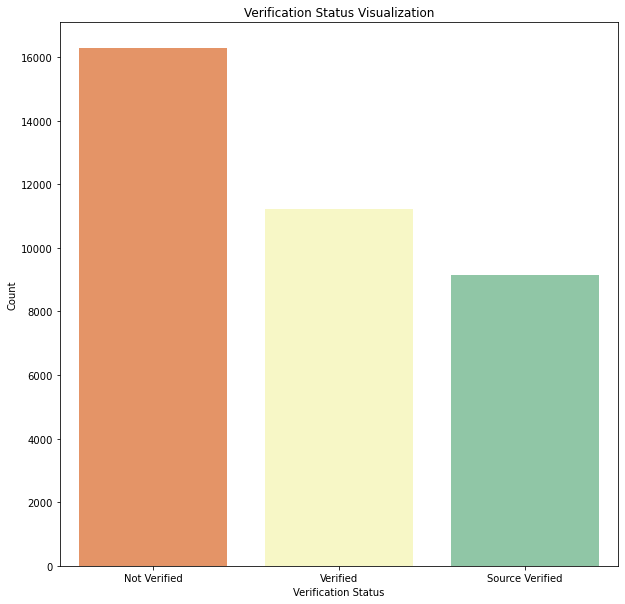

In [81]:
plt.figure(figsize=(10,10))
sns.barplot(x='index', y='verification_status', palette="Spectral", data=data['verification_status'].value_counts().reset_index())
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Verification Status Visualization')

In [82]:
data['verification_status'].value_counts(normalize=True).mul(100).astype(str)+'%'

Not Verified       44.415343482293885%
Verified           30.607846346919843%
Source Verified     24.97681017078627%
Name: verification_status, dtype: object

> Conclusion: 
> 1. Most of the people either have their source verified or is Verified, whereas around 44% are not verified ones

### Length of the employment

Text(0.5, 1.0, 'Employment length Visualization')

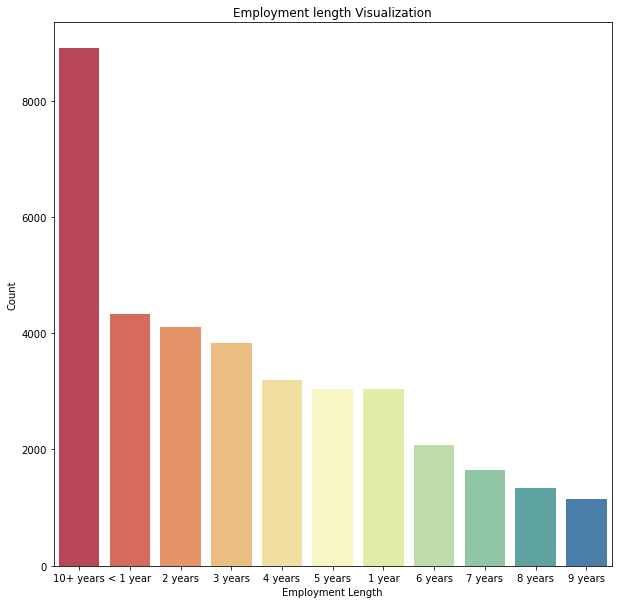

In [83]:
plt.figure(figsize=(10,10))
sns.barplot(x='index', y='emp_length', data=data['emp_length'].value_counts().reset_index(), palette="Spectral")
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Employment length Visualization')

In [84]:
data['emp_length'].value_counts(normalize=True).mul(100).astype(str)+'%'

10+ years     24.28657172477765%
< 1 year     11.804987177388552%
2 years      11.188410541823538%
3 years      10.432694930976155%
4 years       8.730288645168331%
5 years       8.304687073716375%
1 year         8.30195885851476%
6 years       5.655590112948109%
7 years        4.48518579145523%
8 years       3.663993015769084%
9 years       3.145632127462214%
Name: emp_length, dtype: object

> Conclusion: 
> 1. Around 25% of the people have their YOE above 10 years and secondly people with less than or equal to 3 years of experience are in equal proportion.

### Purpose of the Loan

Text(0.5, 1.0, 'Purpose of the Loan')

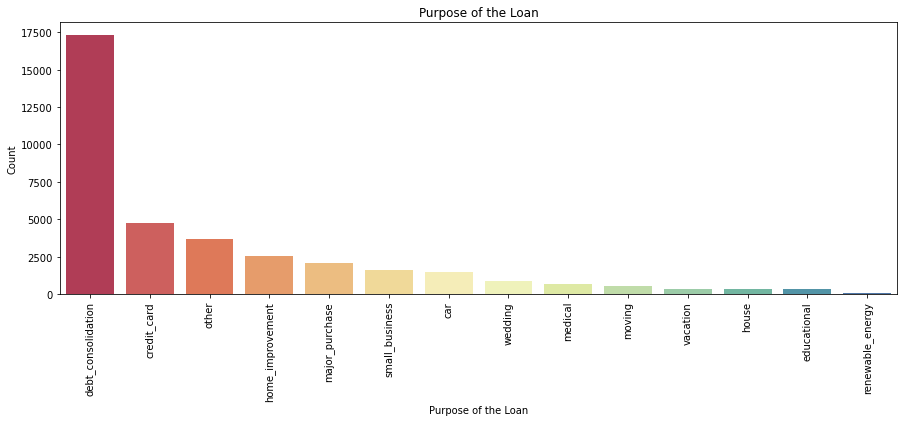

In [85]:
plt.figure(figsize=(15,5))
sns.barplot(x='index', y='purpose', data=data['purpose'].value_counts().reset_index(), palette="Spectral")
plt.xlabel('Purpose of the Loan')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Purpose of the Loan')

In [86]:
data['purpose'].value_counts(normalize=True).mul(100).astype(str)+'%'

debt_consolidation      47.21176406394936%
credit_card             13.04905330932504%
other                  10.091668030774267%
home_improvement        6.973318055328203%
major_purchase          5.581928302504502%
small_business          4.427893272221313%
car                      3.95045561193867%
wedding                2.4362961750422873%
medical                 1.748785944235281%
moving                 1.5005183608883068%
vacation               0.9957985485895127%
house                  0.9221367381459049%
educational            0.8512031429039123%
renewable_energy      0.25918044415343483%
Name: purpose, dtype: object

> Conclusion: 
> 1. Almost 50% of the people take loan to re consolidate their existing loan whereas secondly around 13% people take it to pay their credit card bills
> 2. Almost 10% people take loan with other reasons

## Segmented Univariate Analysis
##### In relation with another column

### In relation with Loan Amount (Since Funded amount, Funded amount inv are very close and relative to each other only Loan amount will be analysed)

Text(0.5, 1.0, 'Loan Amount and Home Ownership')

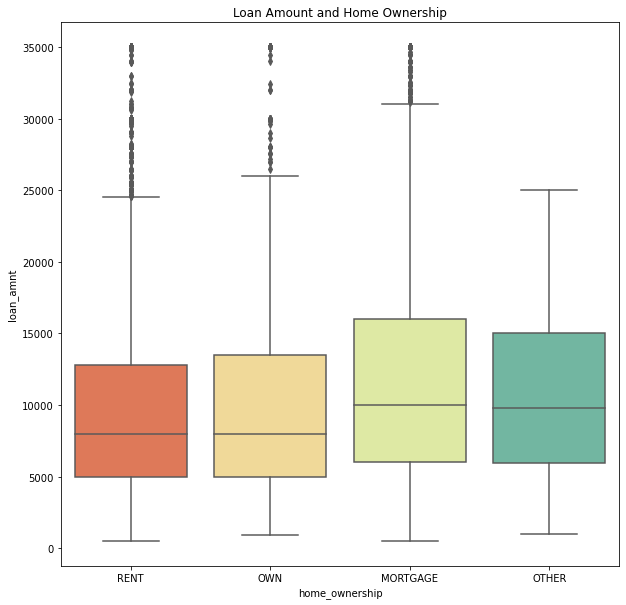

In [87]:
plt.figure(figsize=(10,10))
sns.boxplot(x='home_ownership', y=data['loan_amnt'], data=data, palette="Spectral")
plt.title('Loan Amount and Home Ownership')

> Conclusion: 
> 1. In average people having their house mortgaged or others tend to take higher amount of loan than that of the rent and own house
> 2. Rent and Own have more outliers

Text(0.5, 1.0, 'Loan Amount and Loan Terms')

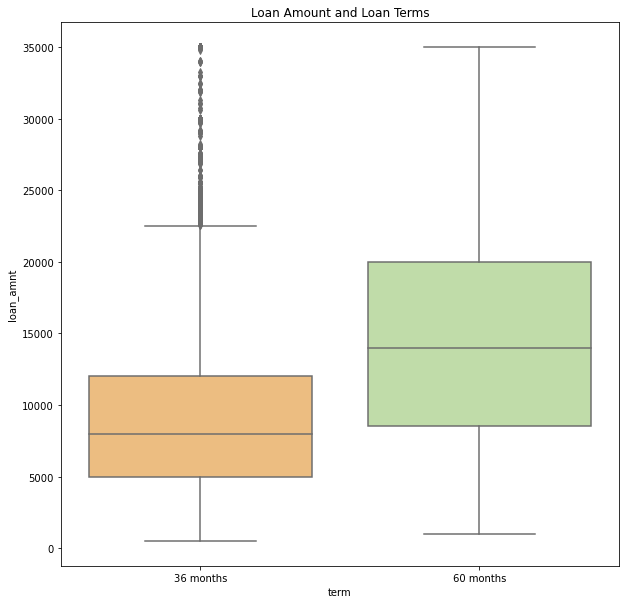

In [88]:
plt.figure(figsize=(10,10))
sns.boxplot(x='term', y=data['loan_amnt'], data=data, palette="Spectral")
plt.title('Loan Amount and Loan Terms')

> Conclusion: 
> 1. People tend to take lesser amount of loan when they are taking it for a term of 36 months and when taking higher amount of loans they choose term of 60 months

Text(0.5, 1.0, 'Loan Amount and Grade')

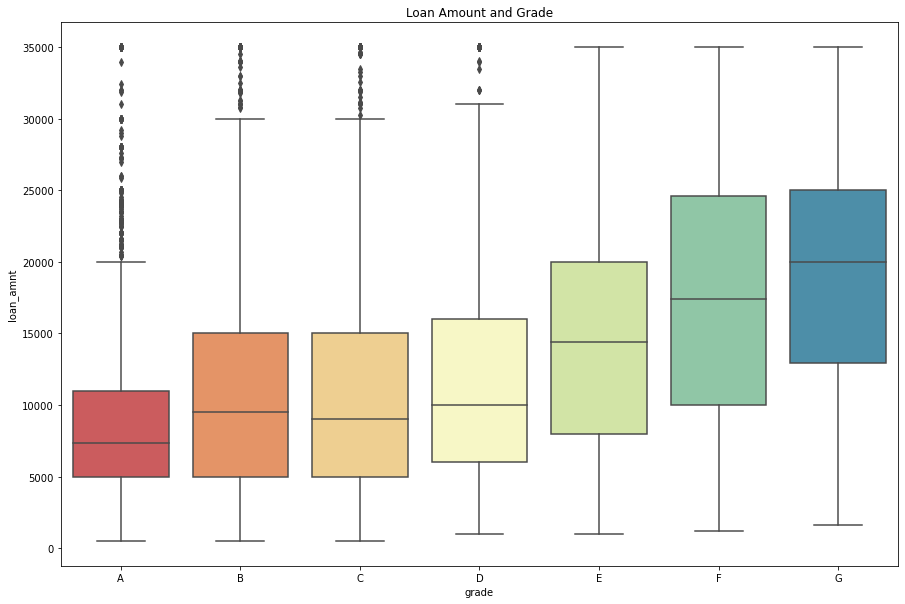

In [89]:
plt.figure(figsize=(15,10))
order = data['grade'].unique()
order.sort()
sns.boxplot(x='grade', y=data['loan_amnt'],order=order, data=data, palette="Spectral")
plt.title('Loan Amount and Grade')

> Conclusion: 
> 1. People with grade A take lower amount of loan in average and sees a increase in every increase in grade
> 2. Average loan of A is very less whereas the average amount of G is the most

Text(0.5, 1.0, 'Loan Amount and Sub Grade')

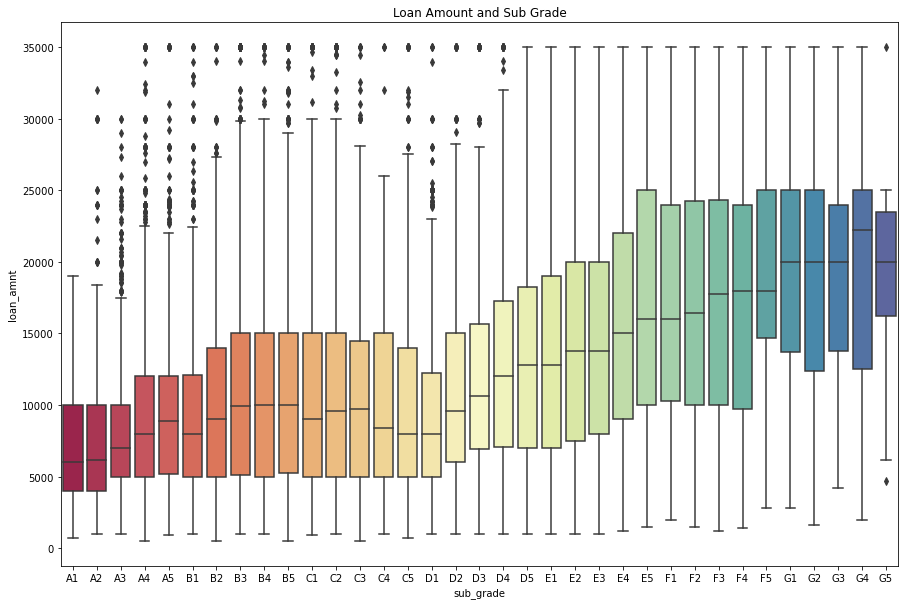

In [90]:
plt.figure(figsize=(15,10))
order = data['sub_grade'].unique()
order.sort()
sns.boxplot(x='sub_grade', y=data['loan_amnt'],order=order, data=data, palette="Spectral")
plt.title('Loan Amount and Sub Grade')

> Conclusion: 
> 1. Rent and Oata looks similar to the grade, just it is deeply sub categorised. Subgrades with initial A take lesser amount of loan compared to that of G initial

Text(0.5, 1.0, 'Loan Amount and Verification Status')

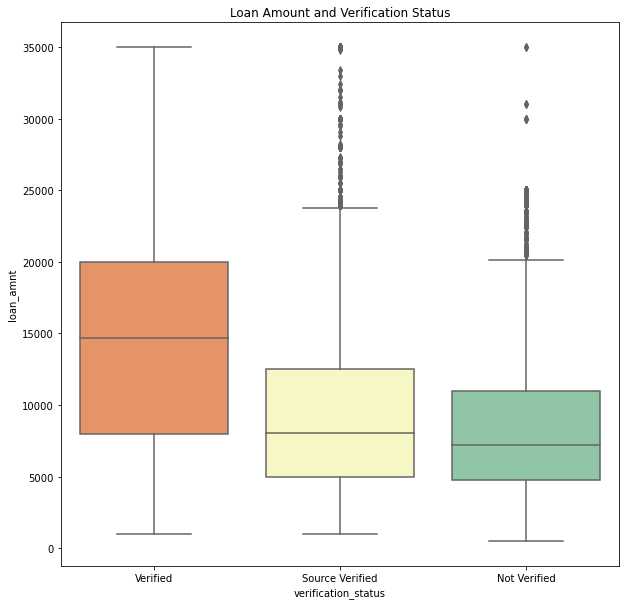

In [91]:
plt.figure(figsize=(10,10))
sns.boxplot(x='verification_status', y=data['loan_amnt'], data=data, palette="Spectral")
plt.title('Loan Amount and Verification Status')

> Conclusion: 
> 1. Person with their status verified, gets higher amount of loan compared to person with either just source verified or not verifier
> 2. Person with not verified status tends to gett the least amount of loan

Text(0.5, 1.0, 'Loan Amount and Issue Year')

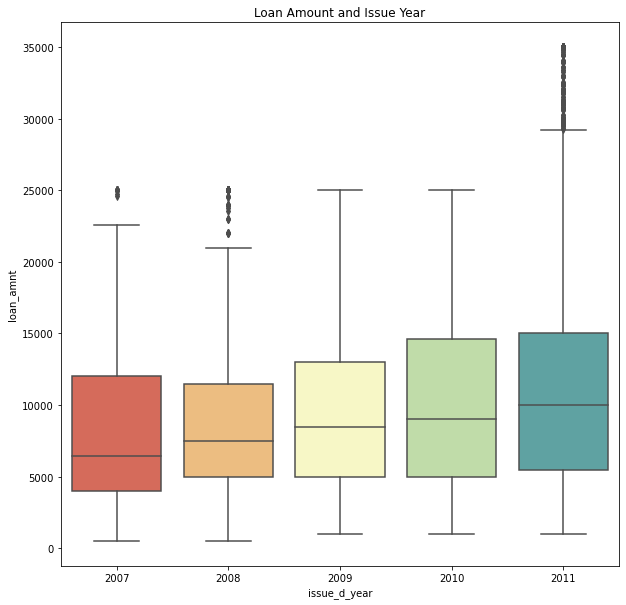

In [92]:
plt.figure(figsize=(10,10))
sns.boxplot(x='issue_d_year', y=data['loan_amnt'], data=data, palette="Spectral")
plt.title('Loan Amount and Issue Year')

> Conclusion: 
> 1. Most of the loan is disbursed in the year of 2011 having the highest means


Text(0.5, 1.0, 'Loan Amount and Issue Month')

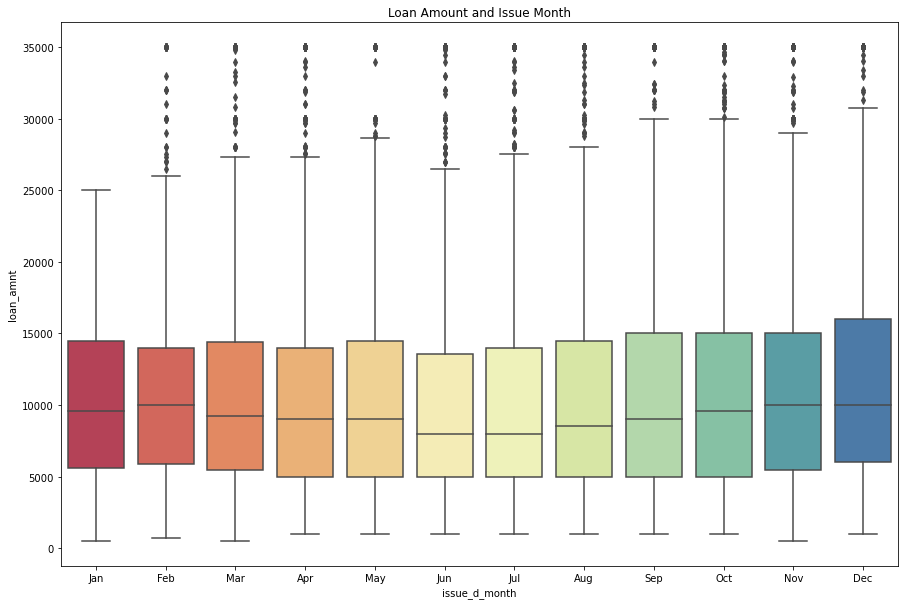

In [93]:
plt.figure(figsize=(15,10))
sns.boxplot(x='issue_d_month',order=date_order, y=data['loan_amnt'], data=data, palette="Spectral")
plt.title('Loan Amount and Issue Month')

> Conclusion: 
> 1. No conclusion can be drawn looking at the disbursement amount in relation with issue month

Text(0.5, 1.0, 'Loan Amount and Employment Length')

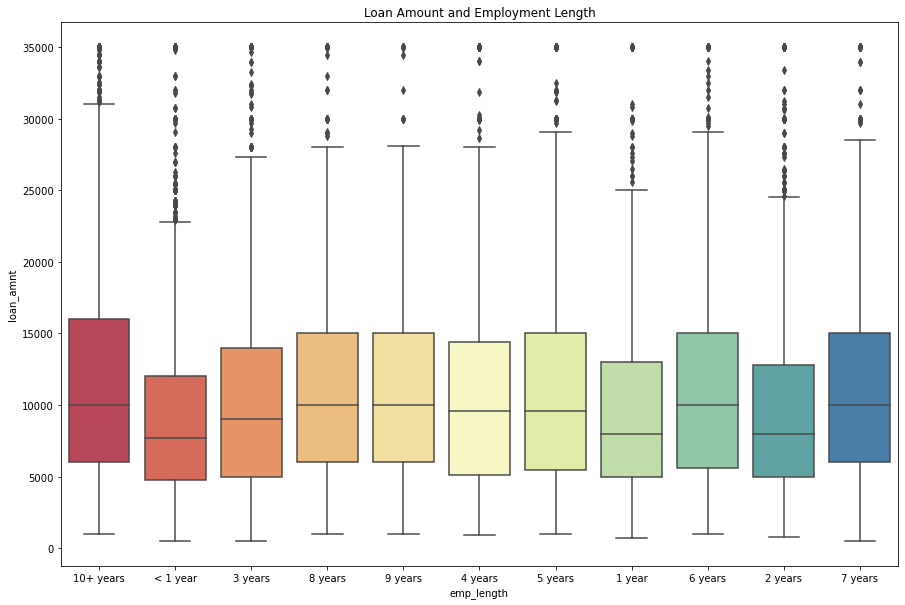

In [94]:
plt.figure(figsize=(15,10))
sns.boxplot(x='emp_length', y=data['loan_amnt'], data=data, palette="Spectral")
plt.title('Loan Amount and Employment Length')

> Conclusion: 
> 1. Most of the borrower having YOE of either 10+ years gets higher amount of loan

Text(0.5, 1.0, 'Loan Amount and Purpose of the loan')

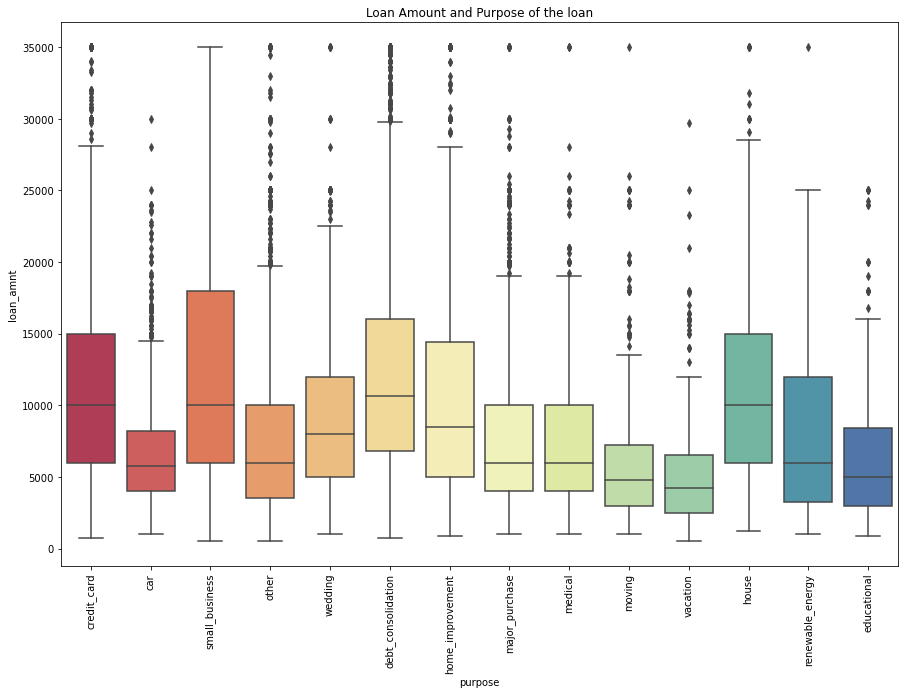

In [95]:
plt.figure(figsize=(15,10))
sns.boxplot(x='purpose', y=data['loan_amnt'], data=data, palette="Spectral")
plt.xticks(rotation=90)
plt.title('Loan Amount and Purpose of the loan')

> Conclusion: 
> 1. Borrower burrowing with the purpose of paying credit card or small business or debt consolidation and for buying a house gets more loan amount compared to other purposes

Text(0.5, 1.0, 'Loan Amount and Loan Status')

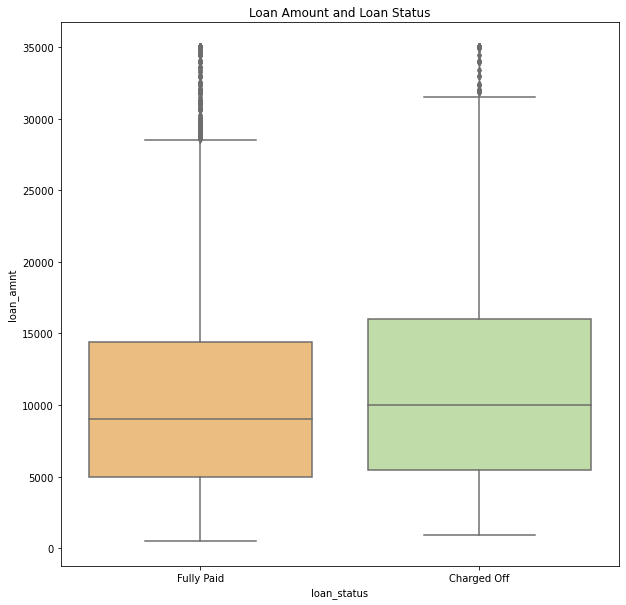

In [96]:
plt.figure(figsize=(10,10))
sns.boxplot(x='loan_status', y=data['loan_amnt'], data=data, palette="Spectral")
plt.title('Loan Amount and Loan Status')

> Conclusion: 
> 1. Mostly loan amount does not decide whether a person repays the loan or chargs off the loan

### In relation with Interest Rate

Text(0.5, 1.0, 'Interest Rate and Home Ownership')

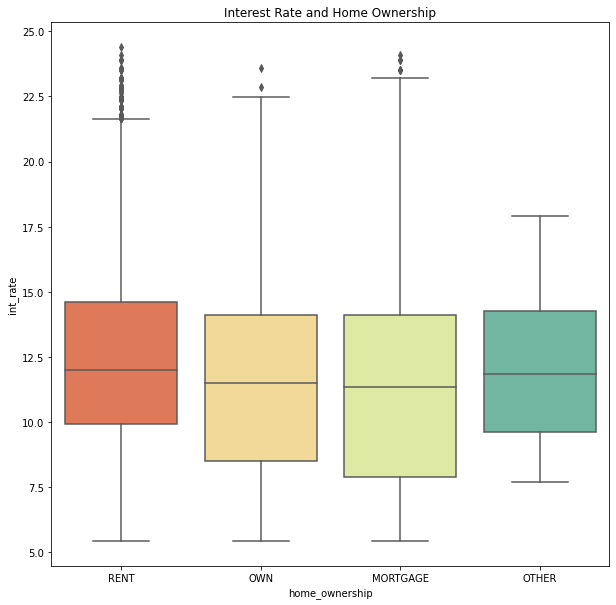

In [97]:
plt.figure(figsize=(10,10))
sns.boxplot(x='home_ownership', y=data['int_rate'], data=data, palette="Spectral")
plt.title('Interest Rate and Home Ownership')

> Conclusion: 
> 1. Person having their own house or have their house Mortgaged, gets loan on a bit lesser interest rate compared to rented or other

Text(0.5, 1.0, 'Interest Rate and Loan Terms')

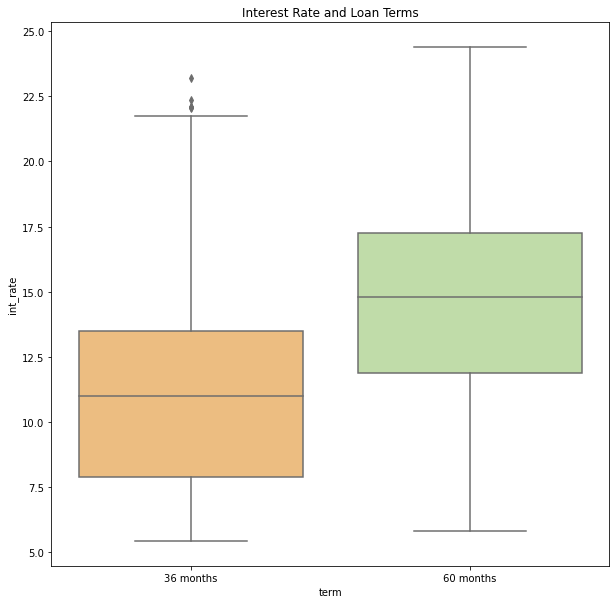

In [98]:
plt.figure(figsize=(10,10))
sns.boxplot(x='term', y=data['int_rate'], data=data, palette="Spectral")
plt.title('Interest Rate and Loan Terms')

> Conclusion: 
> 1. People taking loan for lesser duration (36 months) gets loan at very cheap rate of average ~11% compared to higher duration at ~15% interest rate

Text(0.5, 1.0, 'Interest Rate and Grade')

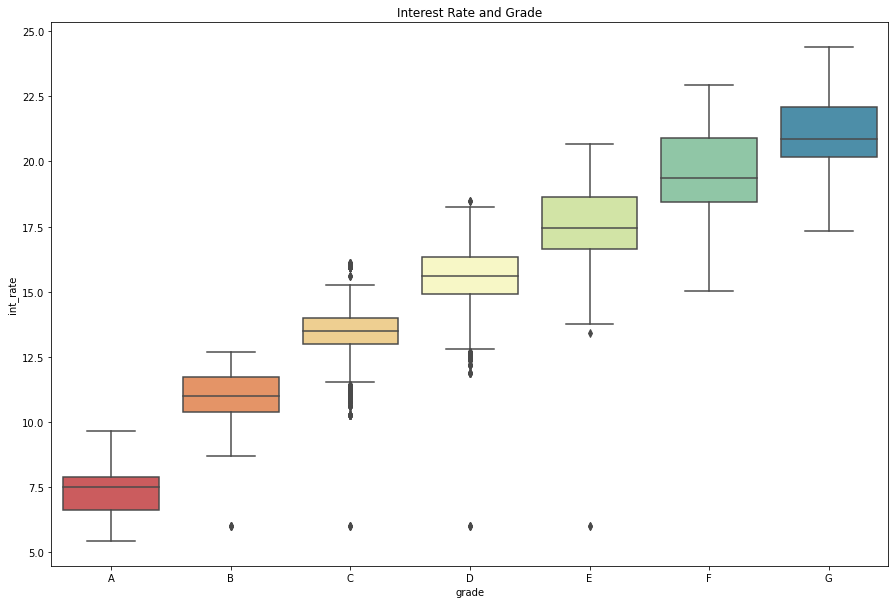

In [99]:
plt.figure(figsize=(15,10))
order = data['grade'].unique()
order.sort()
sns.boxplot(x='grade', y=data['int_rate'],order = order, data=data, palette="Spectral")
plt.title('Interest Rate and Grade')

> Conclusion: 
> 1. Person with A grade reading tends to get loan at significantly cheThe

Text(0.5, 1.0, 'Interest Rate and Sub Grade')

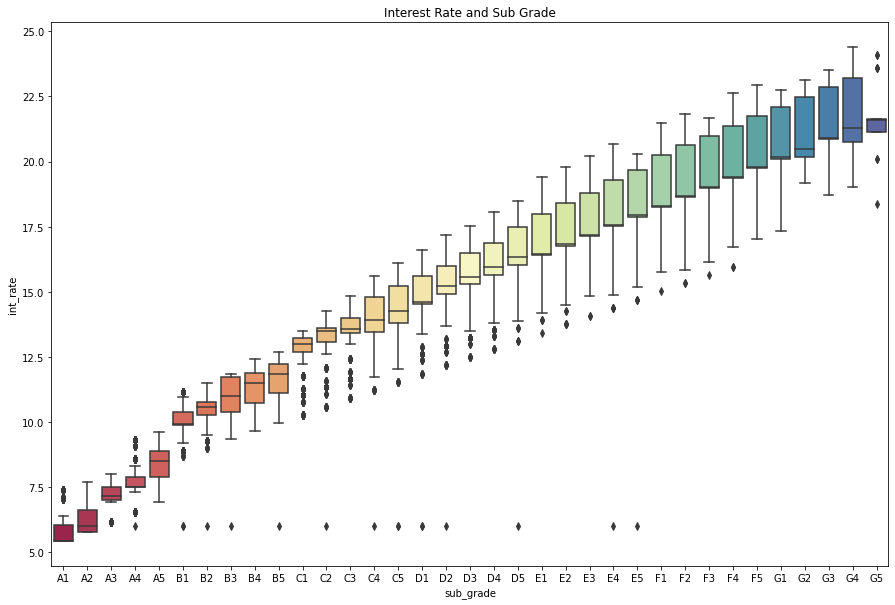

In [100]:
plt.figure(figsize=(15,10))
order = data['sub_grade'].unique()
order.sort()
sns.boxplot(x='sub_grade', y=data['int_rate'], order=order, data=data, palette="Spectral")
plt.title('Interest Rate and Sub Grade')

> Conclusion: 
> 1. The trend of the subgrade looks very similar to the trend of the main category Grade. With every level increment in grade, the interest rate for the loan increases

Text(0.5, 1.0, 'Interest Rate and Verification Status')

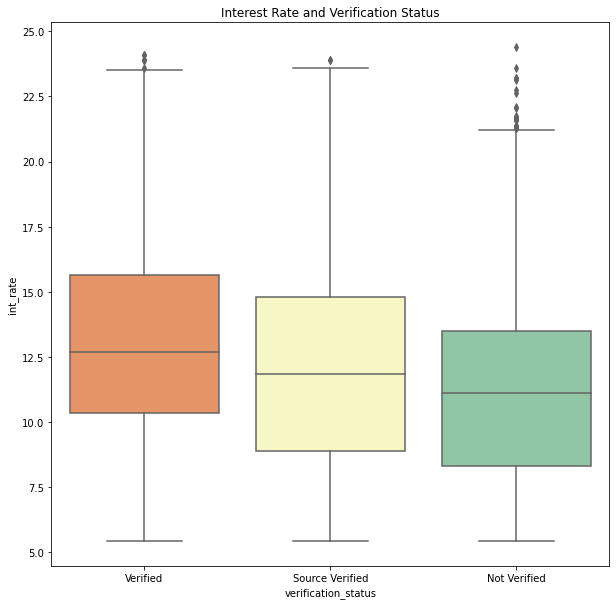

In [101]:
plt.figure(figsize=(10,10))
sns.boxplot(x='verification_status', y=data['int_rate'], data=data, palette="Spectral")
plt.title('Interest Rate and Verification Status')

> Conclusion: 
> 1. No conclusion can be drawn from the verification status as all of them have mostly the similar median rate of interest

Text(0.5, 1.0, 'Interest Rate and Issue Year')

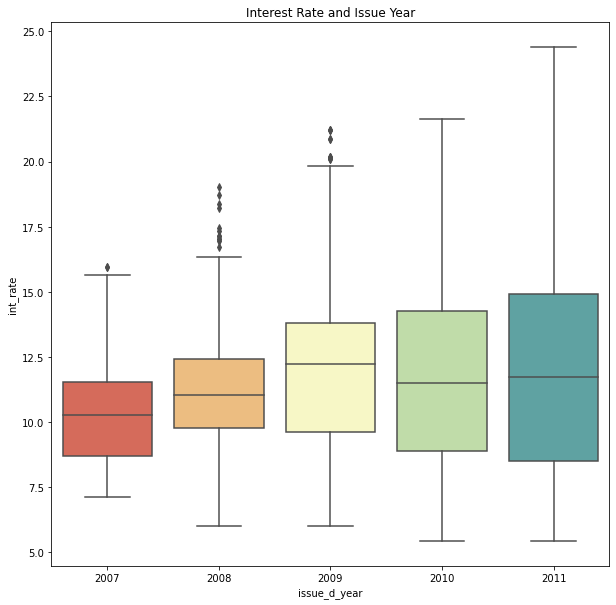

In [102]:
plt.figure(figsize=(10,10))
sns.boxplot(x='issue_d_year', y=data['int_rate'], data=data, palette="Spectral")
plt.title('Interest Rate and Issue Year')

> Conclusion: 
> 1. Loan provided in 2007 had a very small range of interest rate and gradually increased Year to year.
> 2. Interest rate in 2011 had a very big range of interest rate provided to the borrower.

Text(0.5, 1.0, 'Interest Rate and Issue Month')

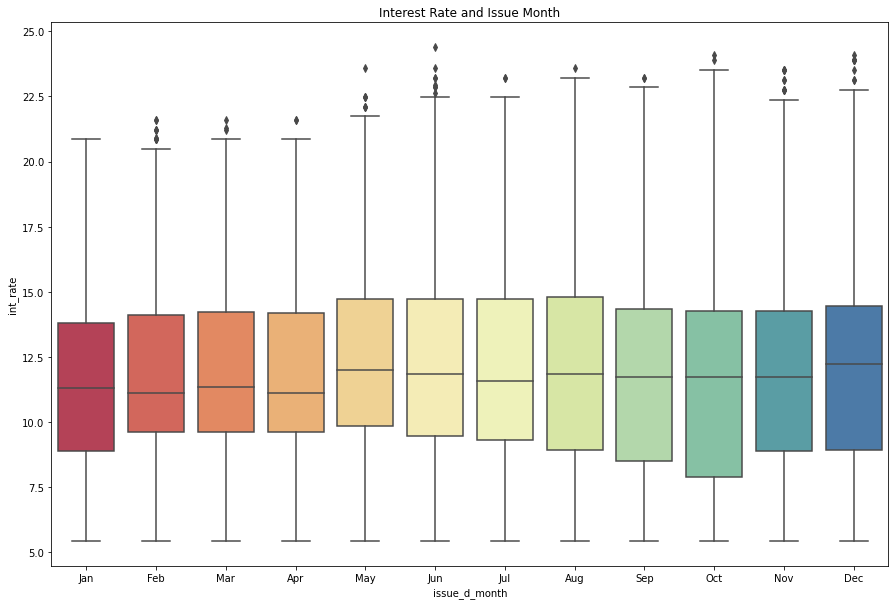

In [103]:
plt.figure(figsize=(15,10))
sns.boxplot(x='issue_d_month', y=data['int_rate'],order=date_order, data=data, palette="Spectral")
plt.title('Interest Rate and Issue Month')

> Conclusion: 
> 1. No conclusion can be drawn between the relation of issue month and the interest rate

Text(0.5, 1.0, 'Interest Rate and Employment Length')

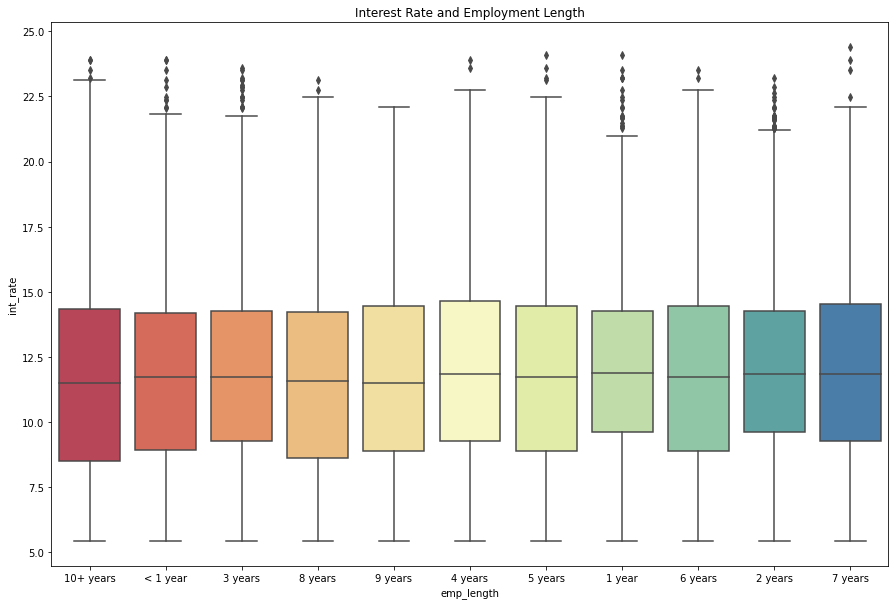

In [104]:
plt.figure(figsize=(15,10))
sns.boxplot(x='emp_length', y=data['int_rate'], data=data, palette="Spectral")
plt.title('Interest Rate and Employment Length')

> Conclusion: 
> 1. No conclusion can be drawn between the relation of Employment length and the interest rate. All box plot looks very similar

Text(0.5, 1.0, 'Interest Rate and Purpose of the loan')

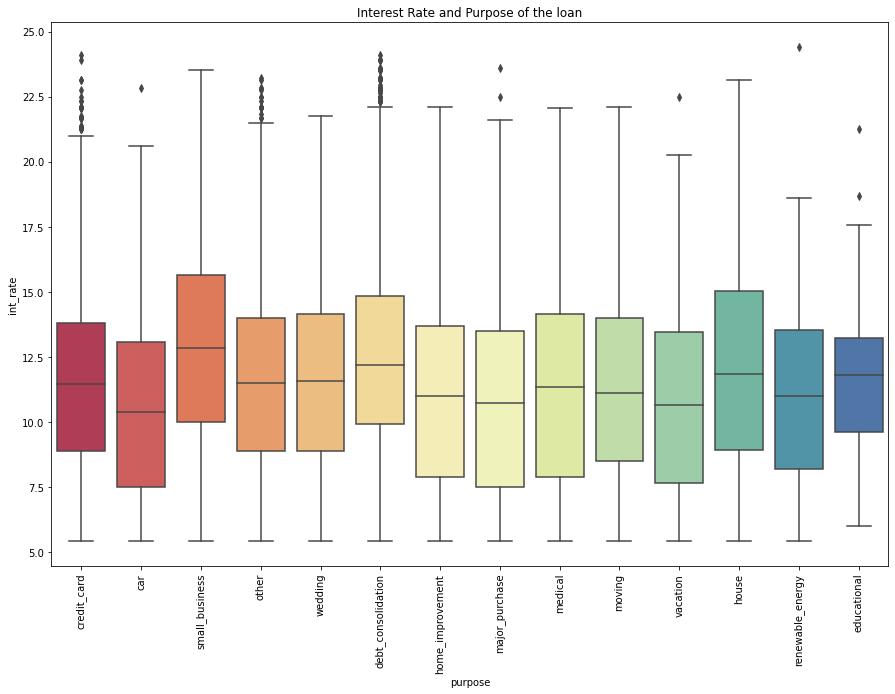

In [105]:
plt.figure(figsize=(15,10))
sns.boxplot(x='purpose', y=data['int_rate'], data=data, palette="Spectral")
plt.xticks(rotation=90)
plt.title('Interest Rate and Purpose of the loan')

> Conclusion: 
> 1. People borrowing with the purpose of small_business, house is used to get it in higher interest rates.  

Text(0.5, 1.0, 'Interest Rate and Loan Status')

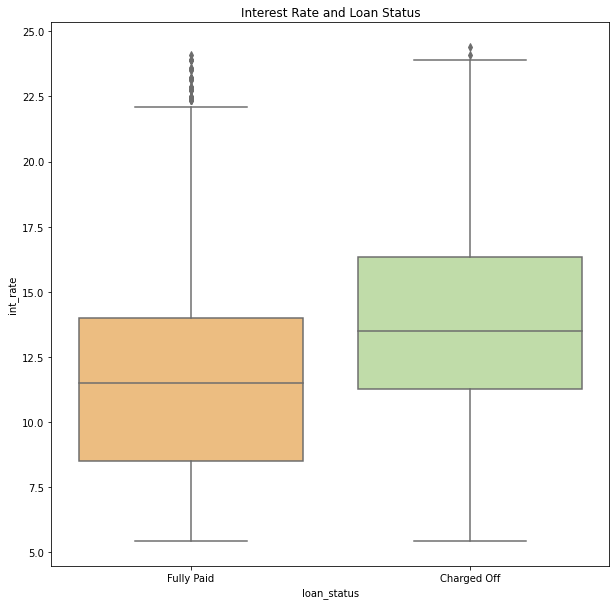

In [106]:
plt.figure(figsize=(10,10))
sns.boxplot(x='loan_status', y=data['int_rate'], data=data, palette="Spectral")
plt.title('Interest Rate and Loan Status')

> Conclusion: 
> 1. More people are likely to charge Off the loan if their interest rate is higher than that of the Fully Paid borrowers

### In relation with DTI

Text(0.5, 1.0, 'DTI and Home Ownership')

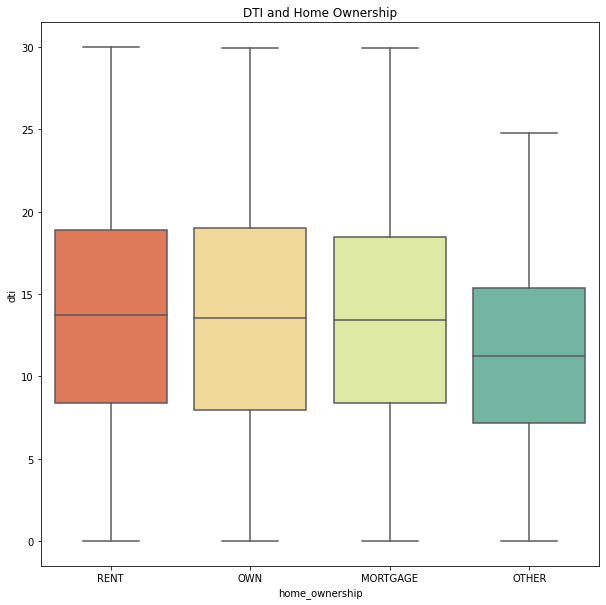

In [107]:
plt.figure(figsize=(10,10))
sns.boxplot(x='home_ownership', y=data['dti'], data=data, palette="Spectral")
plt.title('DTI and Home Ownership')

> Conclusion: 
> 1. DTI is almost similar for the home ownership of rent, own and mortgage. average DTI is a bit lower for Other categrory

Text(0.5, 1.0, 'DTI and Loan Terms')

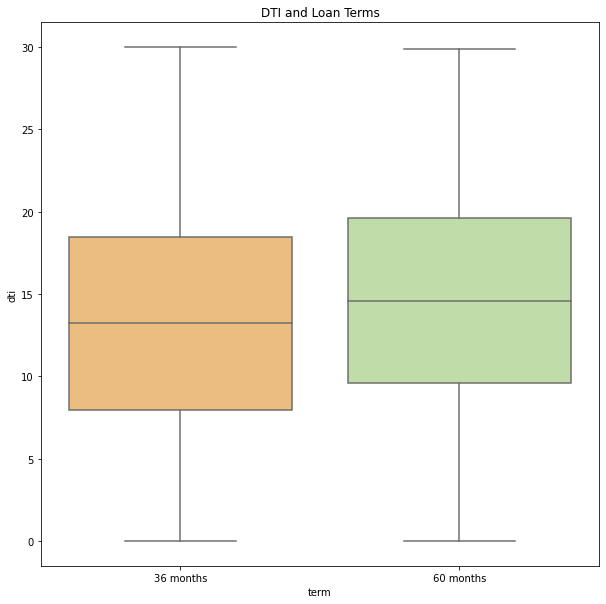

In [108]:
plt.figure(figsize=(10,10))
sns.boxplot(x='term', y=data['dti'], data=data, palette="Spectral")
plt.title('DTI and Loan Terms')

> Conclusion: 
> 1. DTI is Lower of the borrower who is borrowing for 36 months in compared to 60 months

Text(0.5, 1.0, 'DTI and Grade')

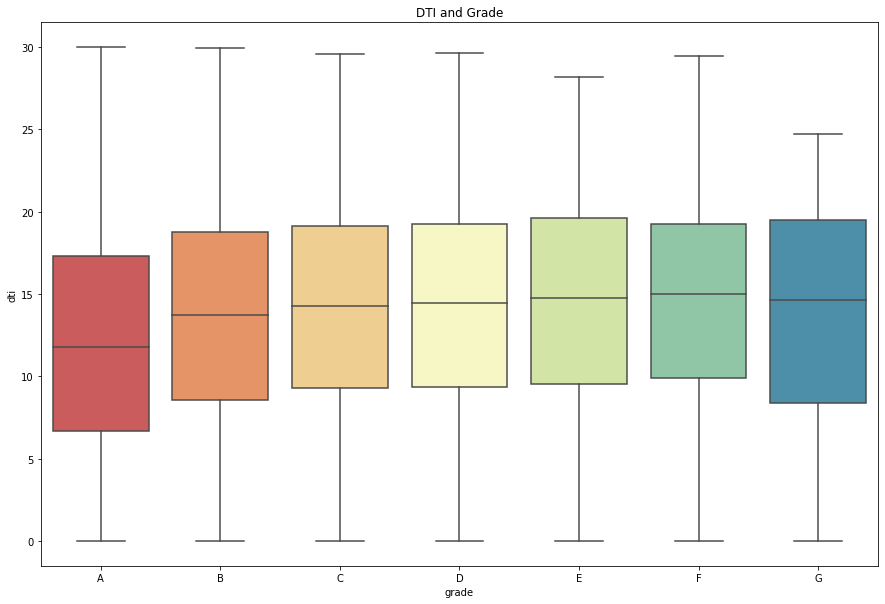

In [109]:
plt.figure(figsize=(15,10))
order = data['grade'].unique()
order.sort()
sns.boxplot(x='grade', y=data['dti'],order = order, data=data, palette="Spectral")
plt.title('DTI and Grade')

> Conclusion: 
> 1. DTI of the A grade owner is a somehow lower in comparison to other Grades

Text(0.5, 1.0, 'DTI and Sub Grade')

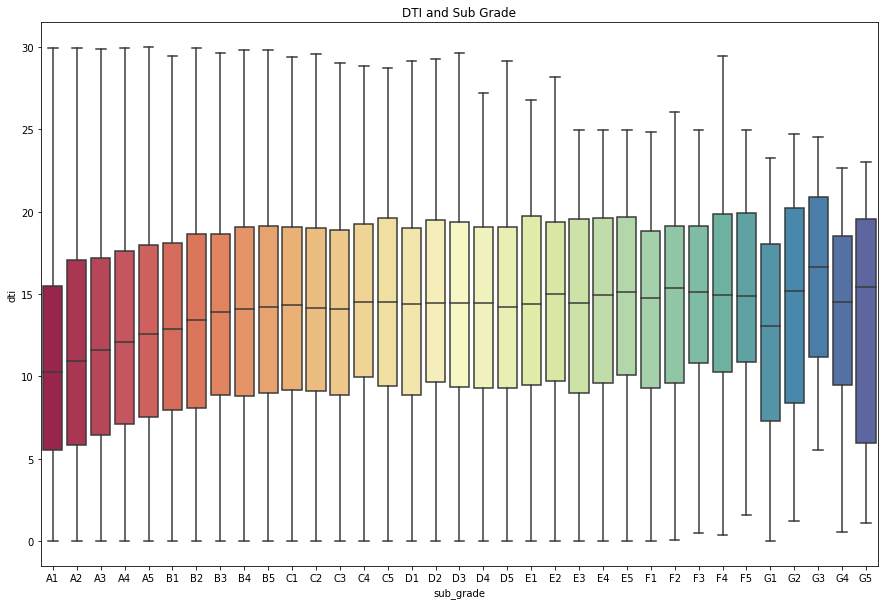

In [110]:
plt.figure(figsize=(15,10))
order = data['sub_grade'].unique()
order.sort()
sns.boxplot(x='sub_grade', y=data['dti'], order=order, data=data, palette="Spectral")
plt.title('DTI and Sub Grade')

> Conclusion: 
> 1. The Sub Grade and DTI follow similar trend to the main category Grade, DTI is lower for A1 grade and gradually increases for other lower grades

Text(0.5, 1.0, 'DTI and Verification Status')

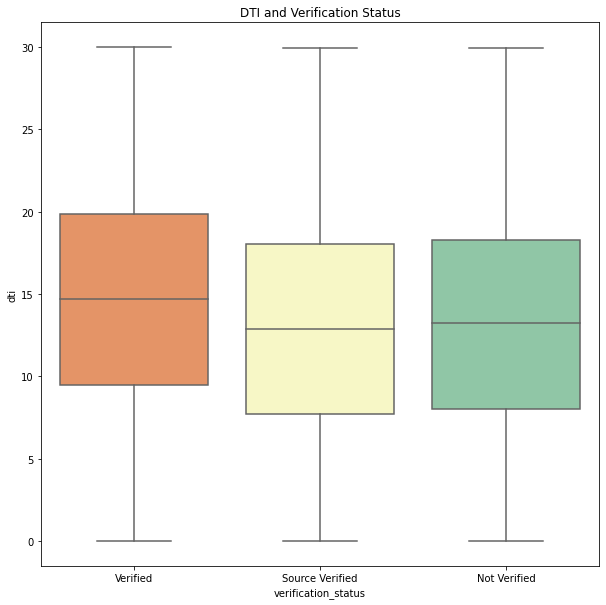

In [111]:
plt.figure(figsize=(10,10))
sns.boxplot(x='verification_status', y=data['dti'], data=data, palette="Spectral")
plt.title('DTI and Verification Status')

> Conclusion: 
> 1. DTI is higher comparer for the verified borrower compared to other source verified and non verifier borrower

Text(0.5, 1.0, 'DTI and Issue Year')

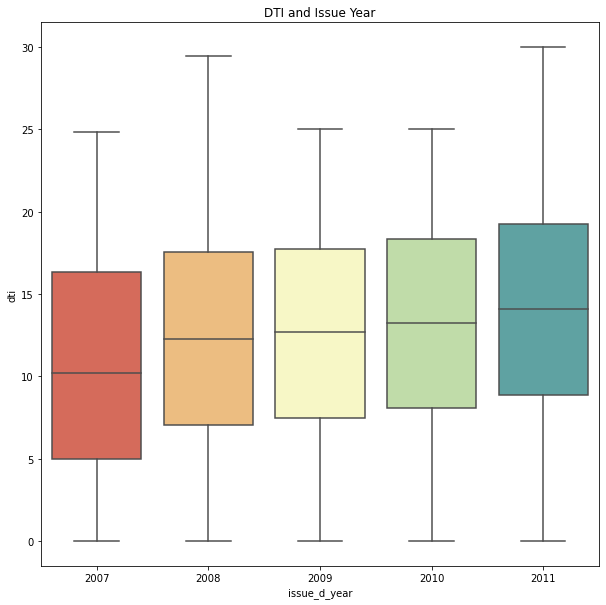

In [112]:
plt.figure(figsize=(10,10))
sns.boxplot(x='issue_d_year', y=data['dti'], data=data, palette="Spectral")
plt.title('DTI and Issue Year')

> Conclusion: 
> 1. DTI of the loan disbursed in 2007 is lower and graduallty increases every year. We can find out that year on year the lender provided loan to people with higher DTI

Text(0.5, 1.0, 'DTI and Issue Month')

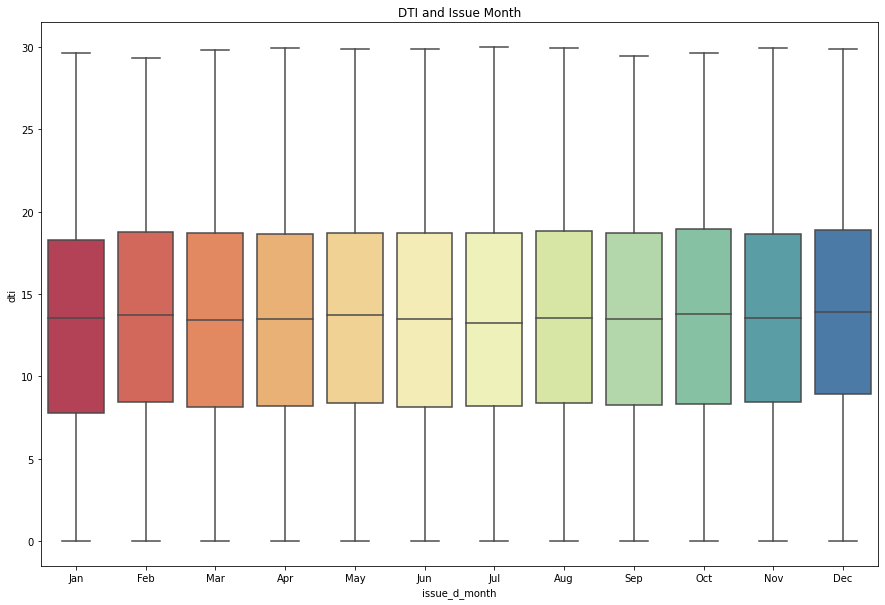

In [113]:
plt.figure(figsize=(15,10))
sns.boxplot(x='issue_d_month', y=data['dti'],order=date_order, data=data, palette="Spectral")
plt.title('DTI and Issue Month')

> Conclusion: 
> 1. No conclusion can be drawn between the relation of issue month and the DTI

Text(0.5, 1.0, 'DTI and Employment Length')

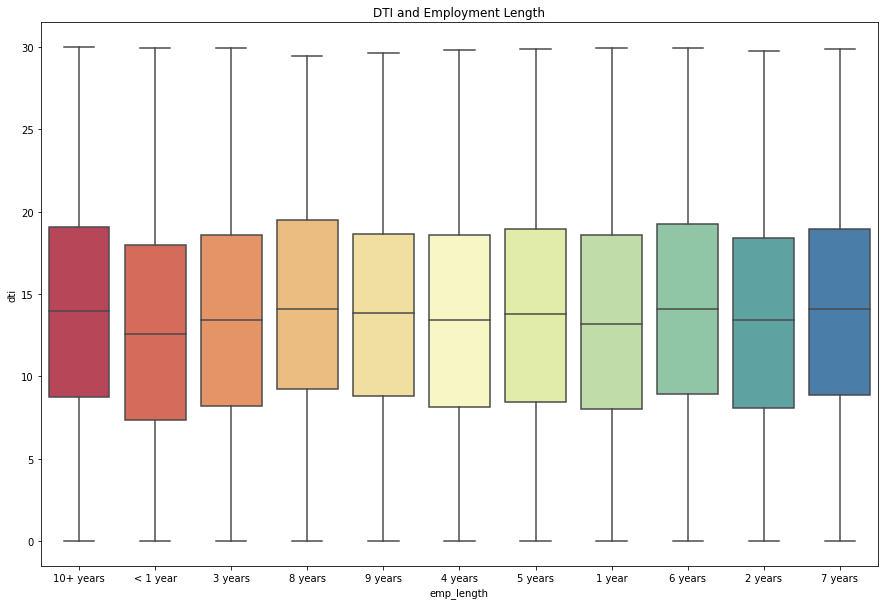

In [114]:
plt.figure(figsize=(15,10))
sns.boxplot(x='emp_length', y=data['dti'], data=data, palette="Spectral")
plt.title('DTI and Employment Length')

> Conclusion: 
> 1. People with less than 1 year of experience have lower DTI

Text(0.5, 1.0, 'DTI and Purpose of the loan')

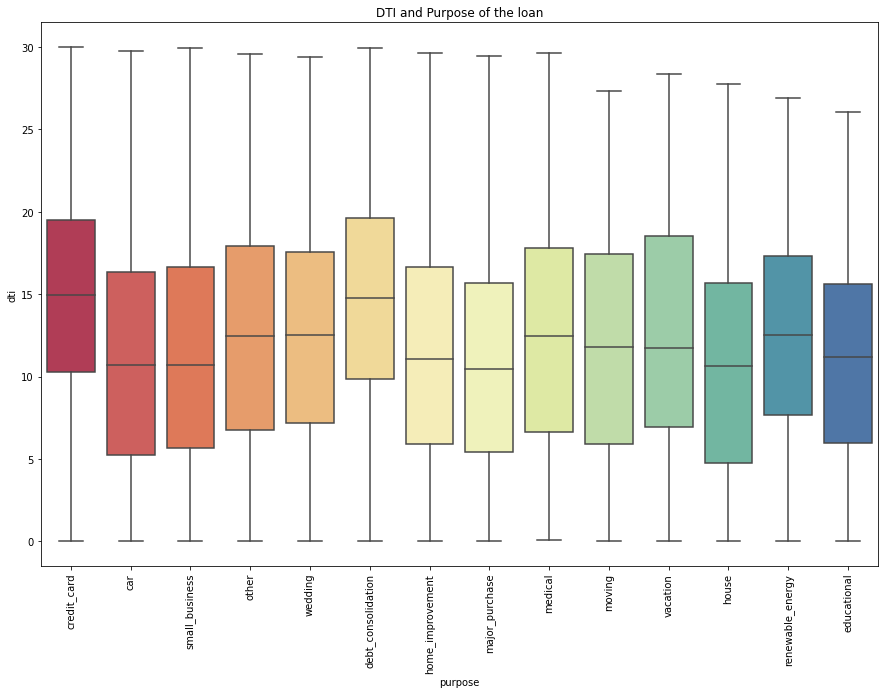

In [115]:
plt.figure(figsize=(15,10))
sns.boxplot(x='purpose', y=data['dti'], data=data, palette="Spectral")
plt.xticks(rotation=90)
plt.title('DTI and Purpose of the loan')

> Conclusion: 
> 1. Borrowers with the purpose of repaying credit card, debt reconsolidation and medical have higher DTI compared to other

Text(0.5, 1.0, 'DTI and Loan Status')

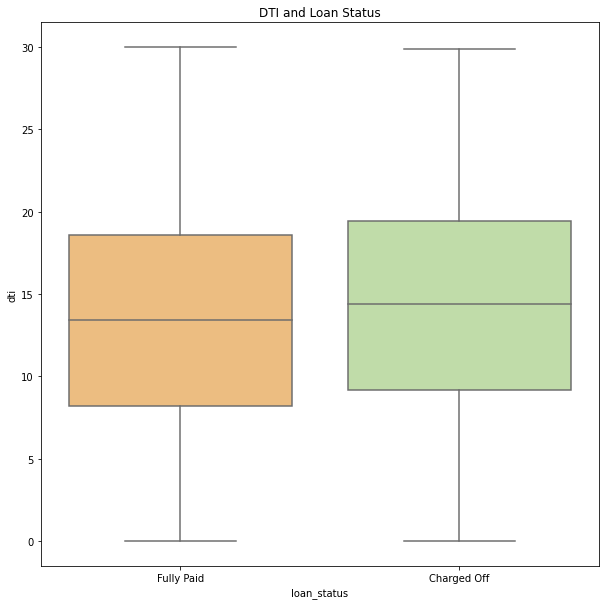

In [116]:
plt.figure(figsize=(10,10))
sns.boxplot(x='loan_status', y=data['dti'], data=data, palette="Spectral")
plt.title('DTI and Loan Status')

> Conclusion: 
> 1. Usually people having higher DTI tends to Charge off their loan

### In relation with Annual Income

Text(0.5, 1.0, 'Annual Income and Home Ownership')

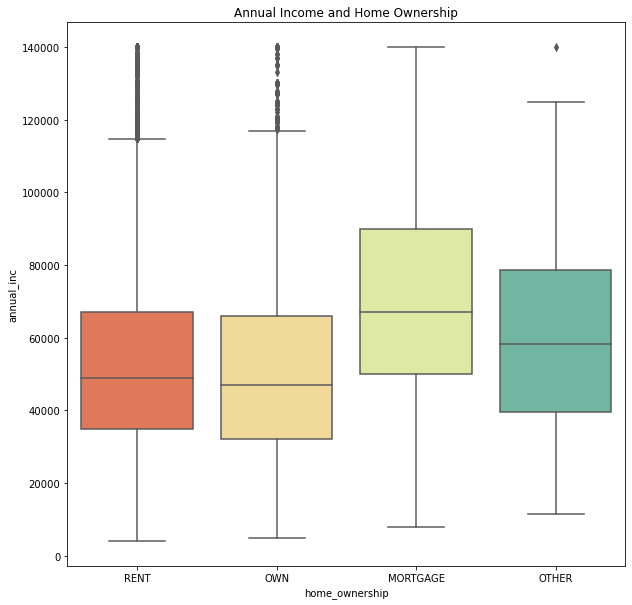

In [117]:
plt.figure(figsize=(10,10))
sns.boxplot(x='home_ownership', y=data['annual_inc'], data=data, palette="Spectral")
plt.title('Annual Income and Home Ownership')

> Conclusion: 
> 1. Borrowers having their house morgaged or other home ownership have higher annual income

Text(0.5, 1.0, 'Annual Income and Loan Terms')

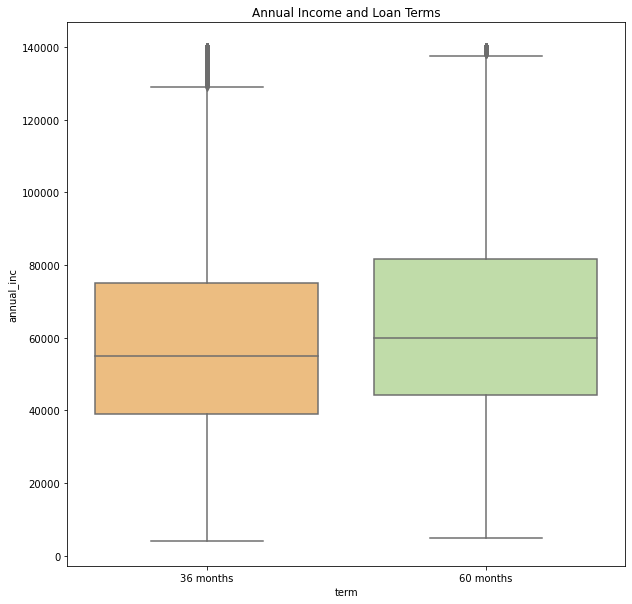

In [118]:
plt.figure(figsize=(10,10))
sns.boxplot(x='term', y=data['annual_inc'], data=data, palette="Spectral")
plt.title('Annual Income and Loan Terms')

> Conclusion: 
> 1. Borrowers taking loan for 60 months have higher annual income compared to 36 months

Text(0.5, 1.0, 'Annual Income and Grade')

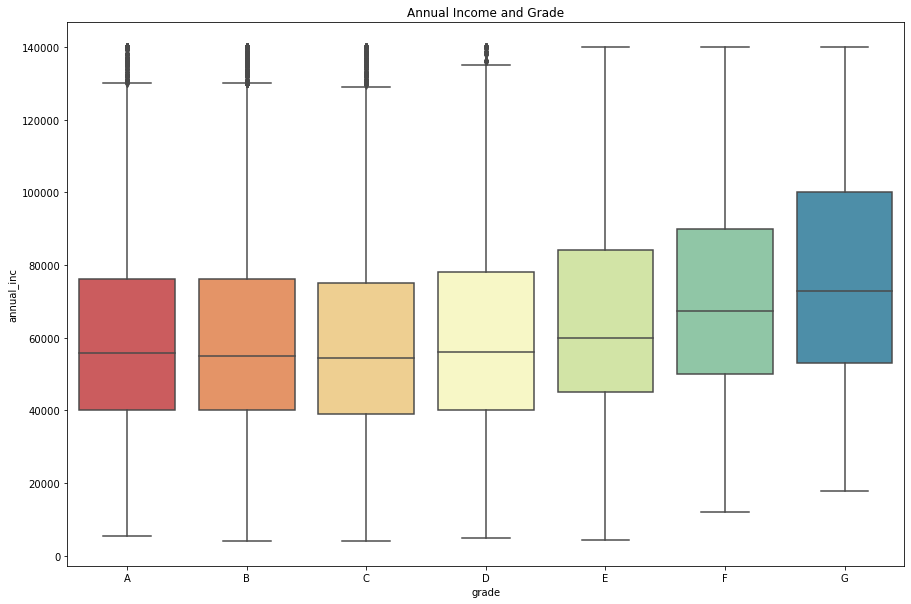

In [119]:
plt.figure(figsize=(15,10))
order = data['grade'].unique()
order.sort()
sns.boxplot(x='grade', y=data['annual_inc'],order = order, data=data, palette="Spectral")
plt.title('Annual Income and Grade')

> Conclusion: 
> 1. Borrowers with higher Grade have higher income

Text(0.5, 1.0, 'Annual Income and Sub Grade')

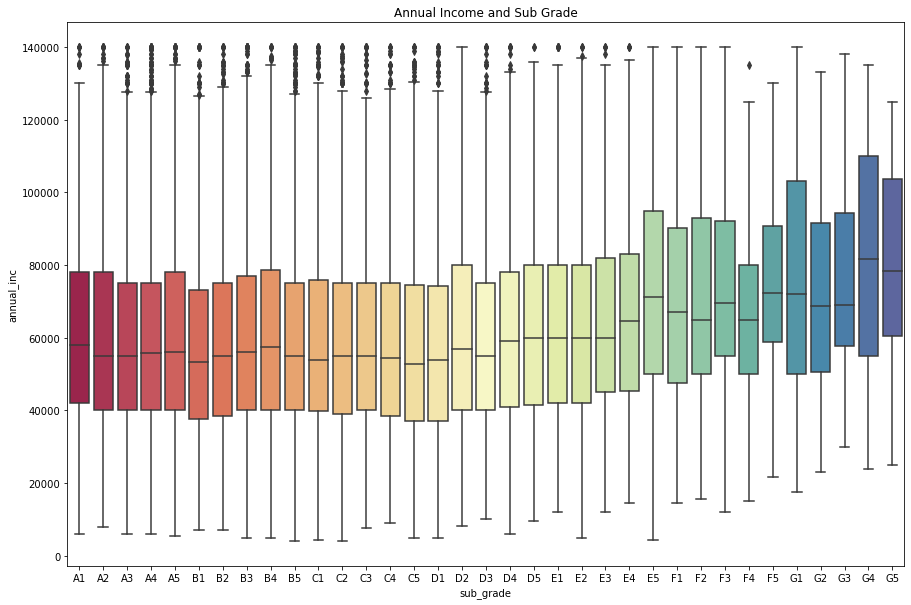

In [120]:
plt.figure(figsize=(15,10))
order = data['sub_grade'].unique()
order.sort()
sns.boxplot(x='sub_grade', y=data['annual_inc'], order=order, data=data, palette="Spectral")
plt.title('Annual Income and Sub Grade')

> Conclusion: 
> 1. Borrowers with lower grade tends to have higher annual income

Text(0.5, 1.0, 'Annual Income and Verification Status')

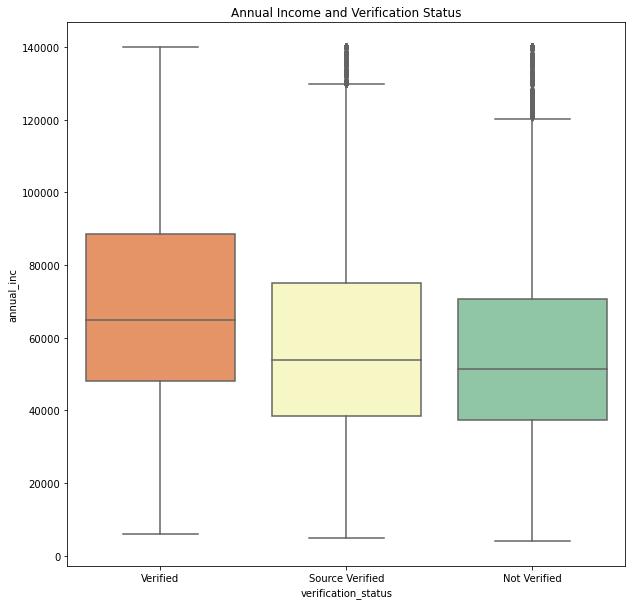

In [121]:
plt.figure(figsize=(10,10))
sns.boxplot(x='verification_status', y=data['annual_inc'], data=data, palette="Spectral")
plt.title('Annual Income and Verification Status')

> Conclusion: 
> 1. Borrowers with verified status have higher annual income compared to the status of source verified and not verified

Text(0.5, 1.0, 'Annual Income and Issue Year')

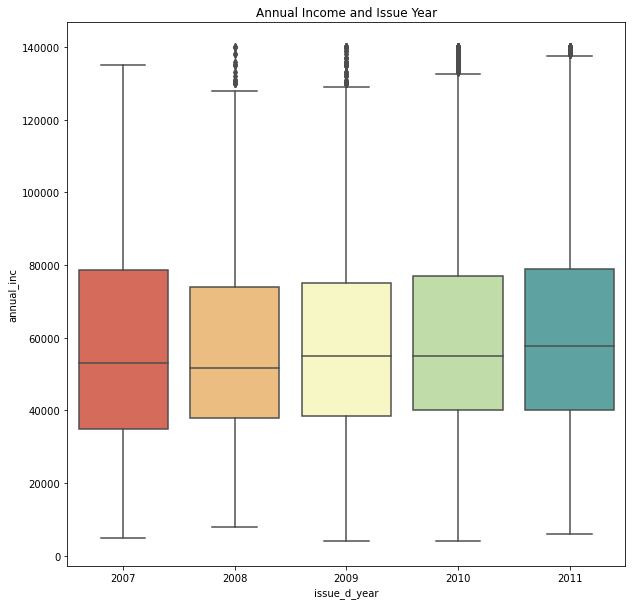

In [122]:
plt.figure(figsize=(10,10))
sns.boxplot(x='issue_d_year', y=data['annual_inc'], data=data, palette="Spectral")
plt.title('Annual Income and Issue Year')

> Conclusion: 
> 1. There is no difference in the annual income of borrower in respective to the year of loan disbursement

Text(0.5, 1.0, 'Annual Income and Issue Month')

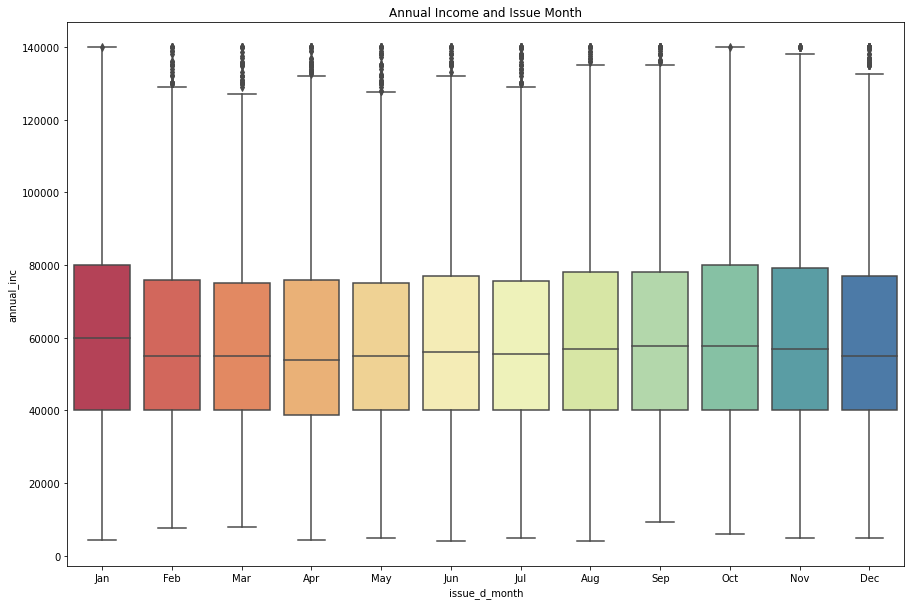

In [123]:
plt.figure(figsize=(15,10))
sns.boxplot(x='issue_d_month', y=data['annual_inc'],order=date_order, data=data, palette="Spectral")
plt.title('Annual Income and Issue Month')

> Conclusion: 
> 1. There is no significant relation between the loan disbursement month and annual income

Text(0.5, 1.0, 'Annual Income and Employment Length')

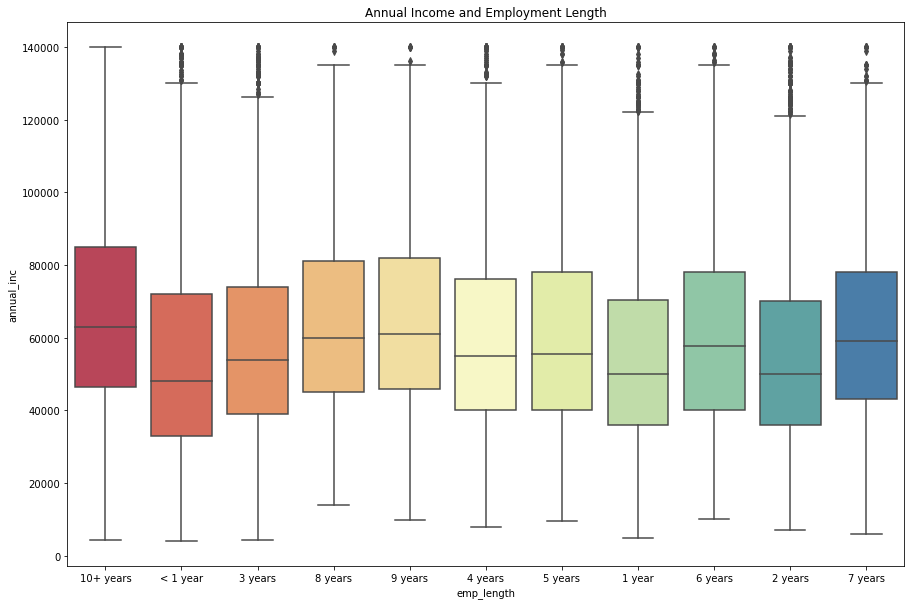

In [124]:
plt.figure(figsize=(15,10))
sns.boxplot(x='emp_length', y=data['annual_inc'], data=data, palette="Spectral")
plt.title('Annual Income and Employment Length')

> Conclusion: 
> 1. Borrowers with 10+ years of experience have higher income

Text(0.5, 1.0, 'Annual Income and Purpose of the loan')

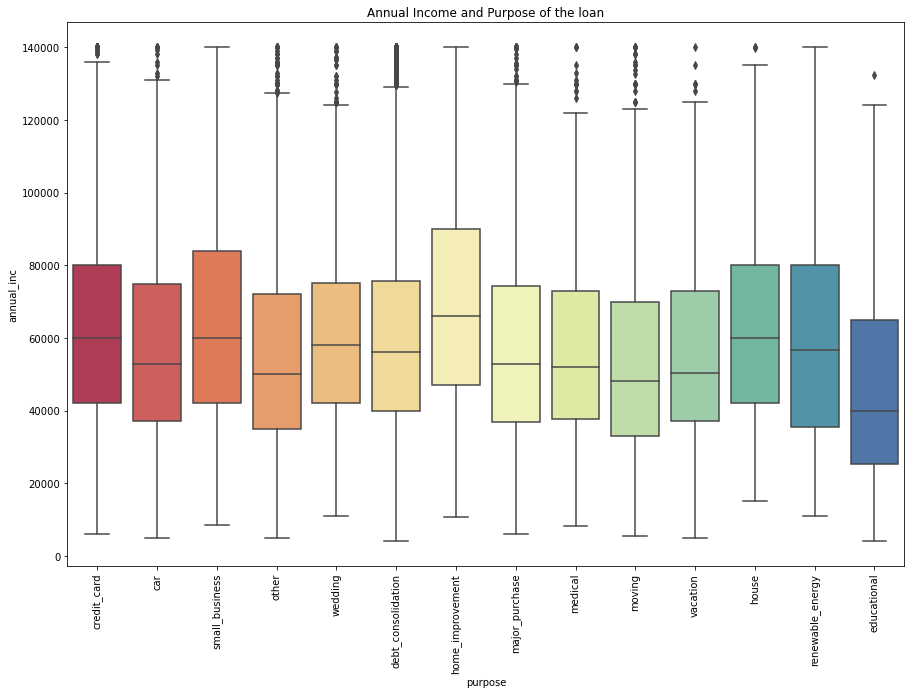

In [125]:
plt.figure(figsize=(15,10))
sns.boxplot(x='purpose', y=data['annual_inc'], data=data, palette="Spectral")
plt.xticks(rotation=90)
plt.title('Annual Income and Purpose of the loan')

> Conclusion: 
> 1. Borrowers taking loan with the purpose of home improvement have higher annual income compared to others

Text(0.5, 1.0, 'Annual Income and Loan Status')

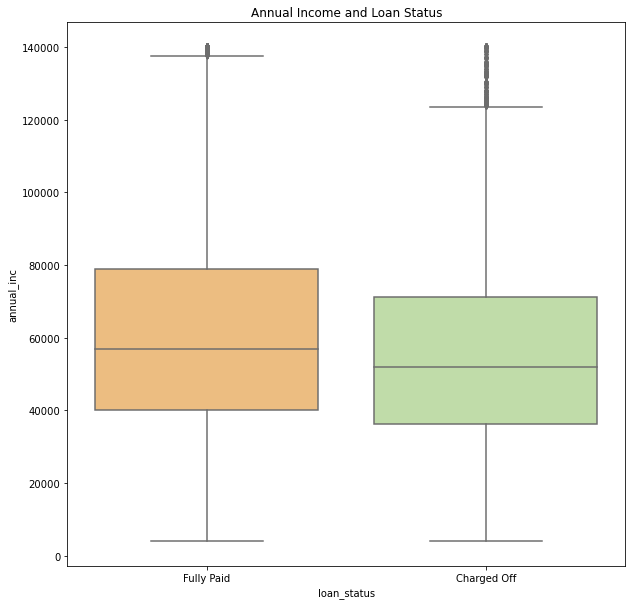

In [126]:
plt.figure(figsize=(10,10))
sns.boxplot(x='loan_status', y=data['annual_inc'], data=data, palette="Spectral")
plt.title('Annual Income and Loan Status')

> Conclusion: 
> 1. Borrowers taking fully paying their loan have higher annual income compared the defaulters

## Bivariate Analysis
#### In relation with the Charged off loan status

#### Annual Income and Purpose of the loan

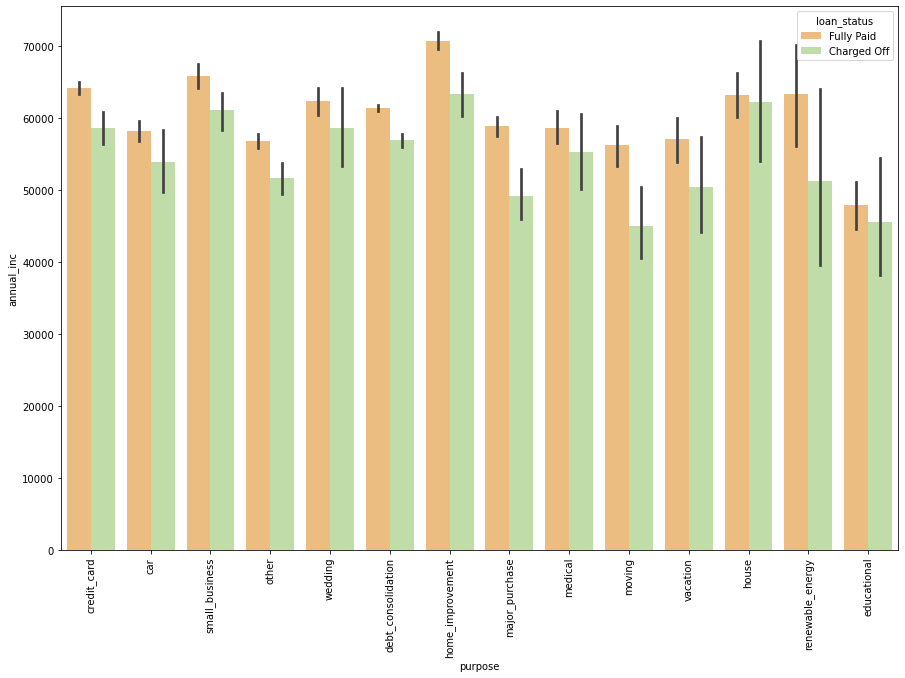

In [127]:
plt.figure(figsize=(15,10))
sns.barplot(data =data,x='purpose', y='annual_inc', hue ='loan_status',palette="Spectral")
plt.xticks(rotation=90)
plt.show()

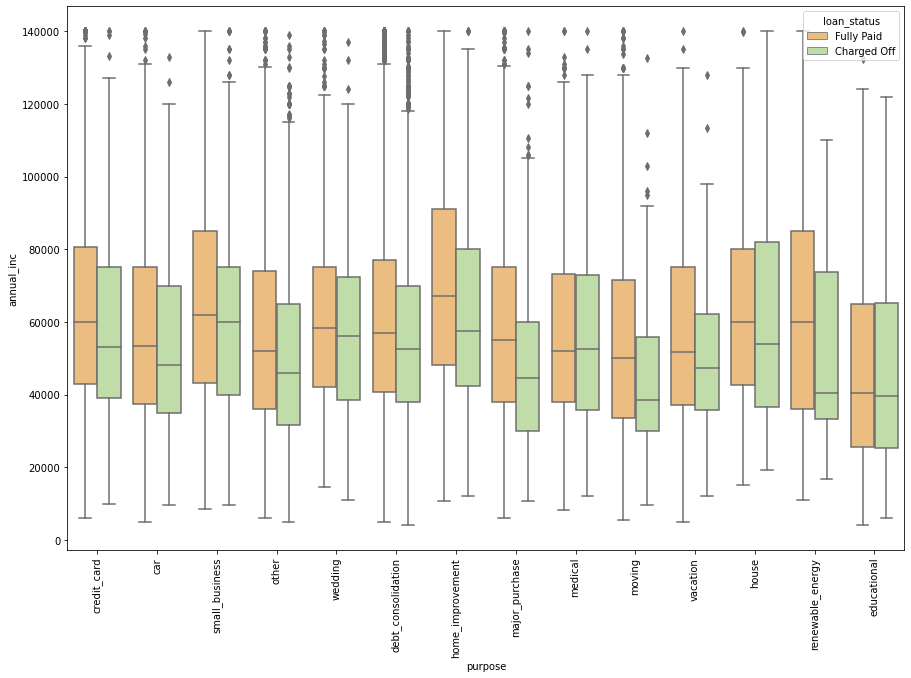

In [128]:
plt.figure(figsize=(15,10))
sns.boxplot(data =data,x='purpose', y='annual_inc', hue ='loan_status',palette="Spectral")
plt.xticks(rotation=90)
plt.show()

> Conclusion: 
> 1. People charging off are higher if they are borrowing for house and home improvement

#### Annual Income and Home Ownership

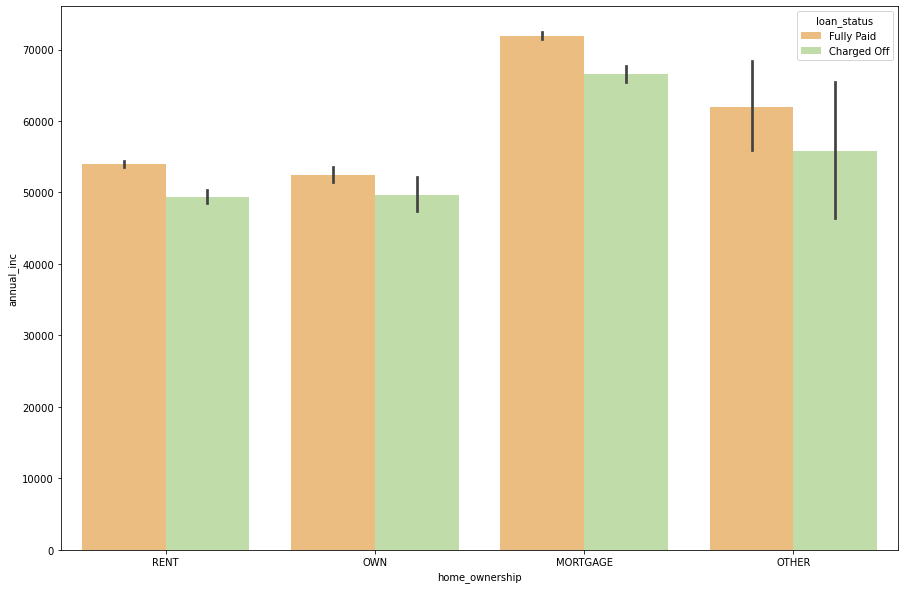

In [129]:
plt.figure(figsize=(15,10))
sns.barplot(data =data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="Spectral")
plt.show()

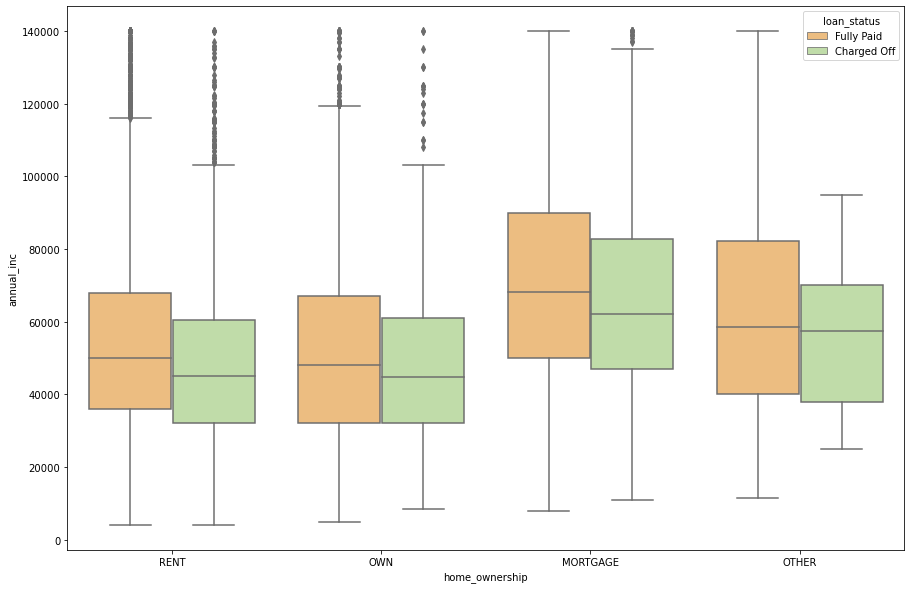

In [130]:
plt.figure(figsize=(15,10))
sns.boxplot(data =data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="Spectral")
plt.show()

> Conclusion: 
> 1. People having their home morgaged have higher income and also many people charges off their loan 

#### Term and Loan Amount

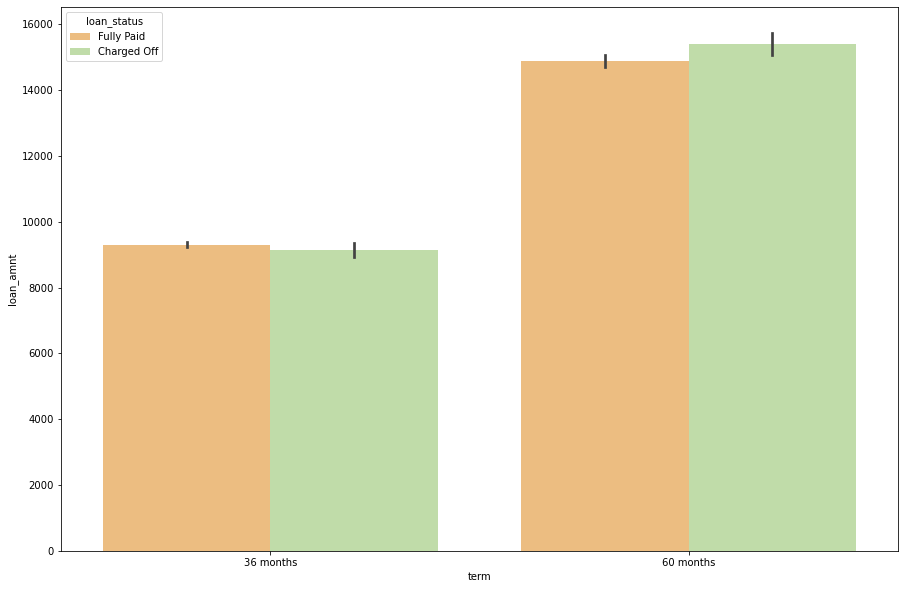

In [131]:
plt.figure(figsize=(15,10))
sns.barplot(data =data,x='term', y='loan_amnt', hue ='loan_status',palette="Spectral")
plt.show()

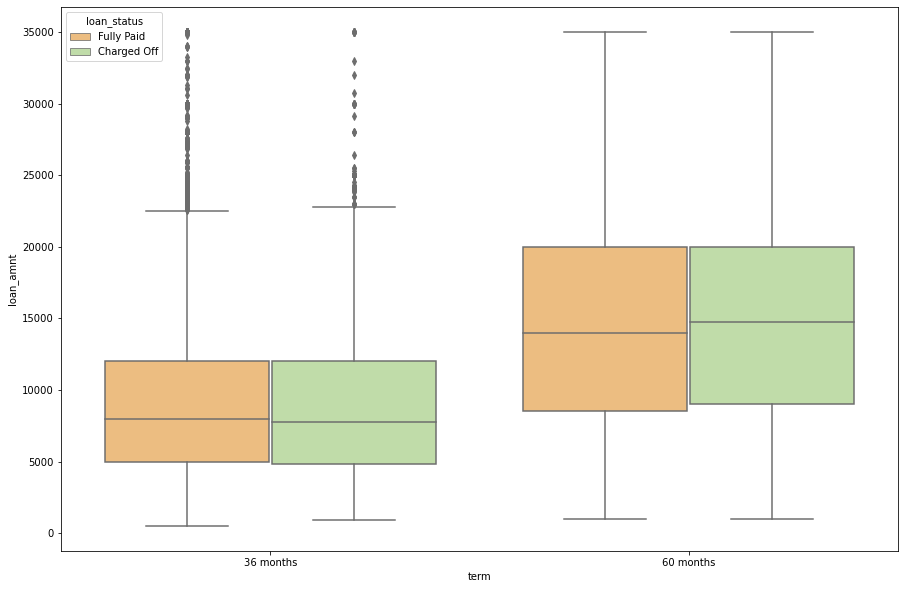

In [132]:
plt.figure(figsize=(15,10))
sns.boxplot(data =data,x='term', y='loan_amnt', hue ='loan_status',palette="Spectral")
plt.show()

> Conclusion: 
> 1. Borrowers taking loan for 60 months have higher annual income and has higher probability of charging off the loan

#### Term and Interest Rate

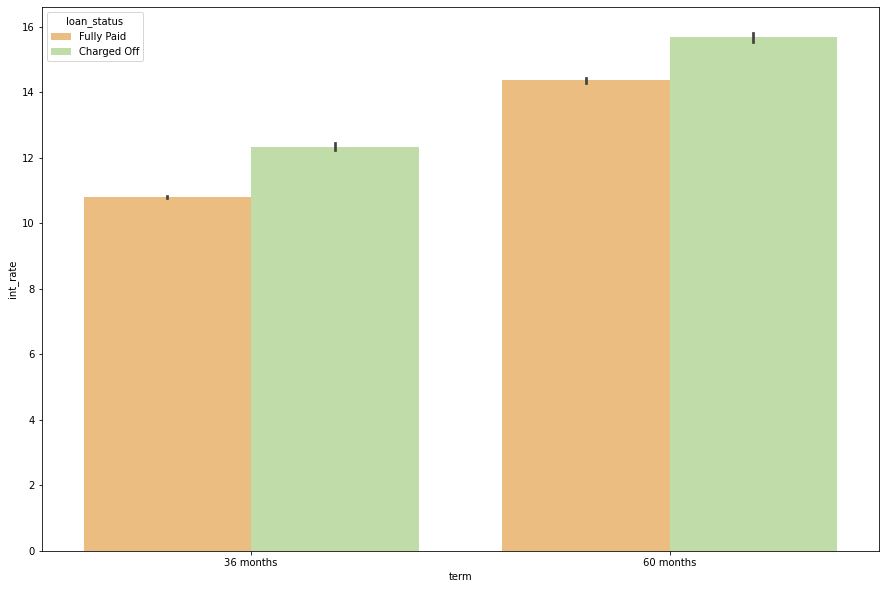

In [133]:
plt.figure(figsize=(15,10))
sns.barplot(data =data,x='term', y='int_rate', hue ='loan_status',palette="Spectral")
plt.show()

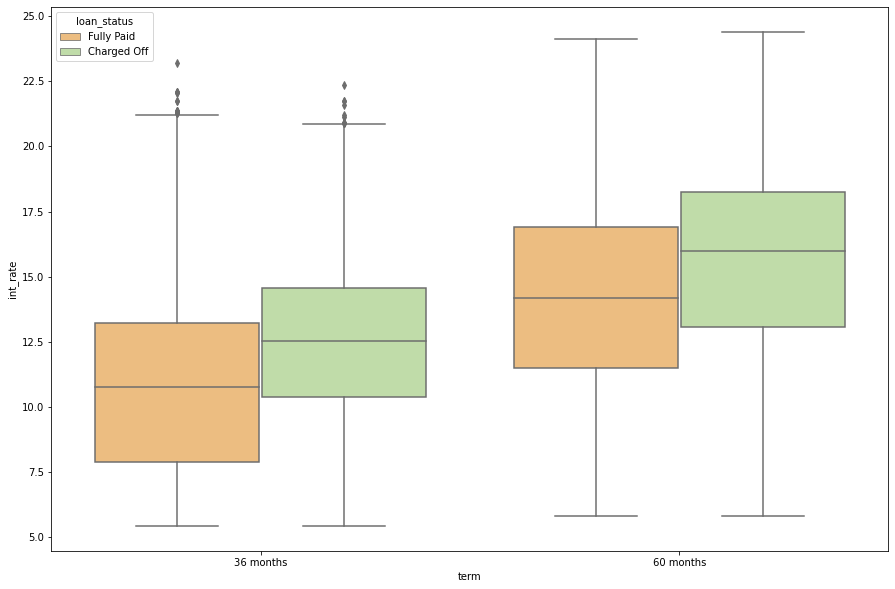

In [134]:
plt.figure(figsize=(15,10))
sns.boxplot(data =data,x='term', y='int_rate', hue ='loan_status',palette="Spectral")
plt.show()

> Conclusion: 
> 1. Borrowers taking loan for 60 months have higher Interest rate and has higher probability of charging off the loan

#### Loan Amount and Purpose of the Loan

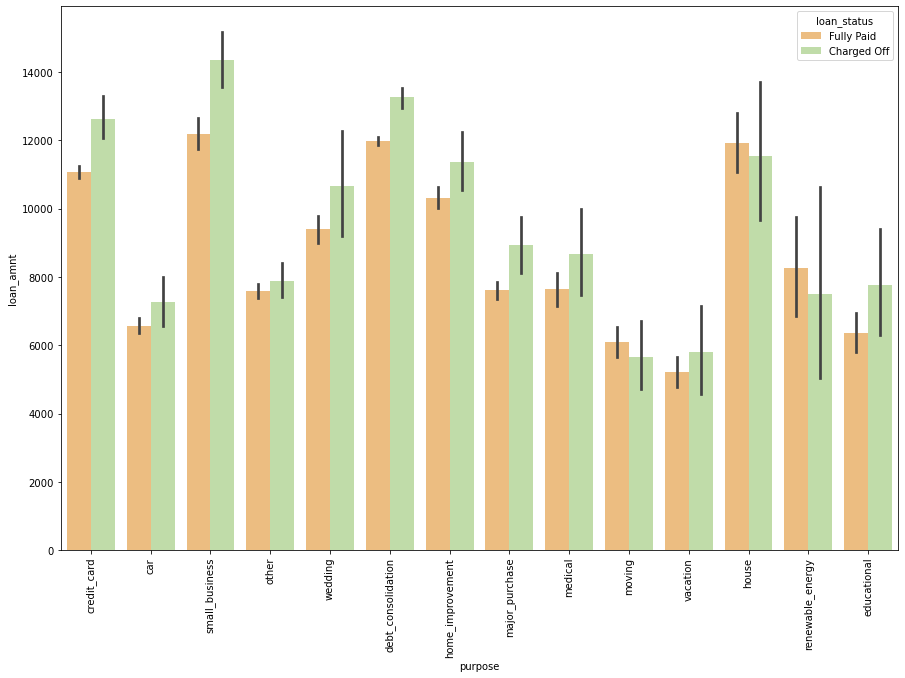

In [135]:
plt.figure(figsize=(15,10))
sns.barplot(data =data,x='purpose', y='loan_amnt', hue ='loan_status',palette="Spectral")
plt.xticks(rotation=90)
plt.show()

> Conclusion: 
> 1. Borrowers taking loan of higher amount and has purpose of credit_card, small_business and debt_consolidation are more likely to charge off the loan

#### Home Ownership and Loan Amount

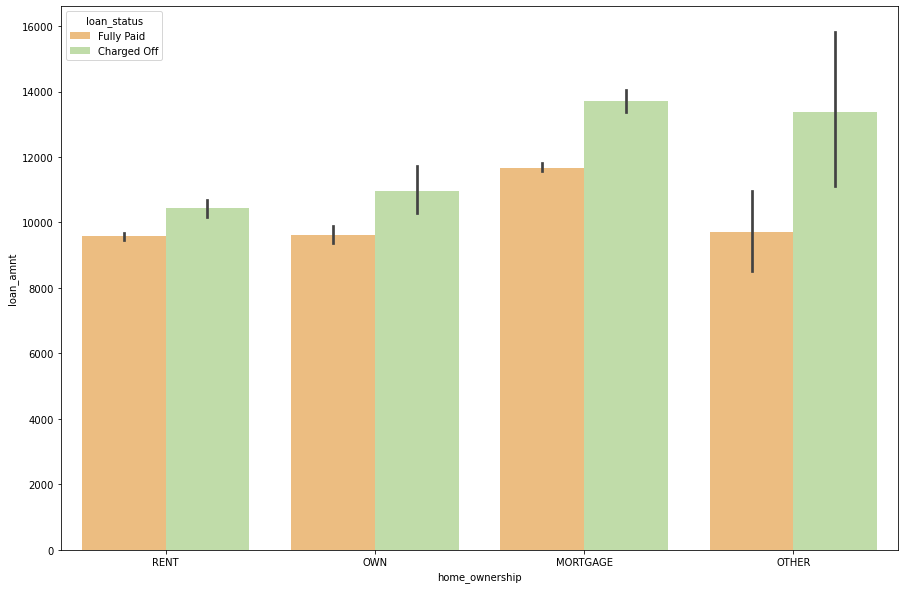

In [136]:
plt.figure(figsize=(15,10))
sns.barplot(data =data,x='home_ownership', y='loan_amnt', hue ='loan_status',palette="Spectral")
plt.show()

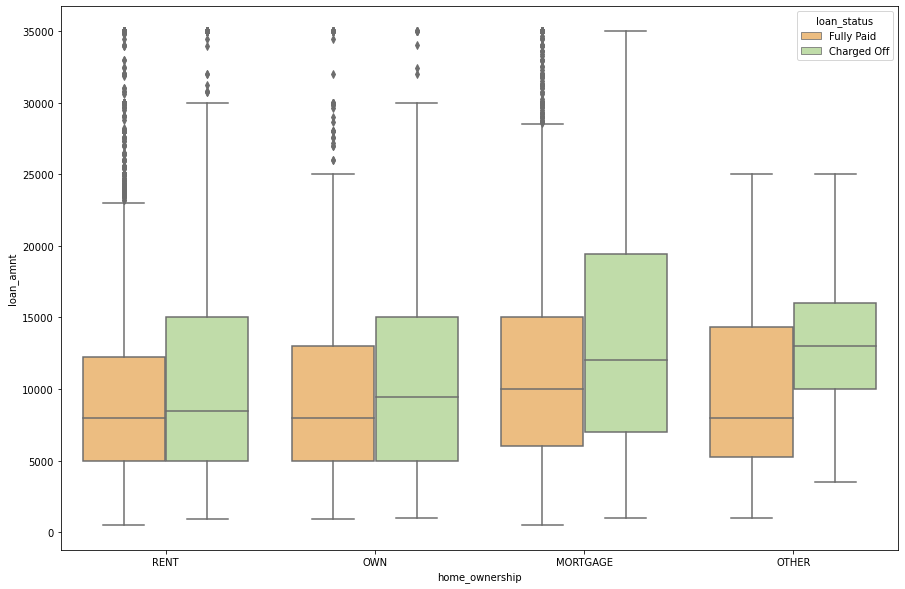

In [137]:
plt.figure(figsize=(15,10))
sns.boxplot(data =data,x='home_ownership', y='loan_amnt', hue ='loan_status',palette="Spectral")
plt.show()

> Conclusion: 
> 1. Borrowers taking loan of higher amount and has home ownership of any are more likely to charge off the loan

#### Term and DTI

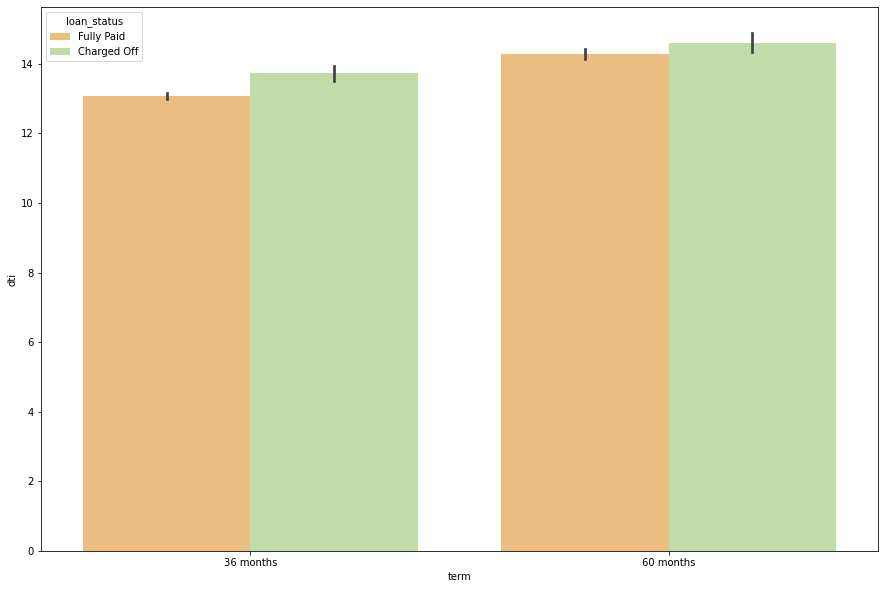

In [138]:
plt.figure(figsize=(15,10))
sns.barplot(data =data,x='term', y='dti', hue ='loan_status',palette="Spectral")
plt.show()

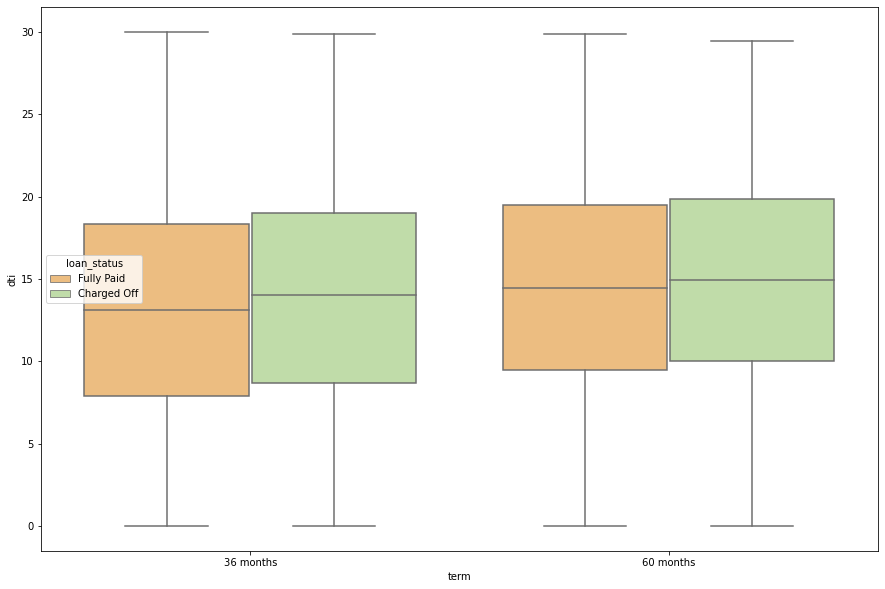

In [139]:
plt.figure(figsize=(15,10))
sns.boxplot(data =data,x='term', y='dti', hue ='loan_status',palette="Spectral")
plt.show()

> Conclusion: 
> 1. Borrowers having higher DTI unrelative to the terms of the loan, tend to default their loan

#### Grade and Interest Rate

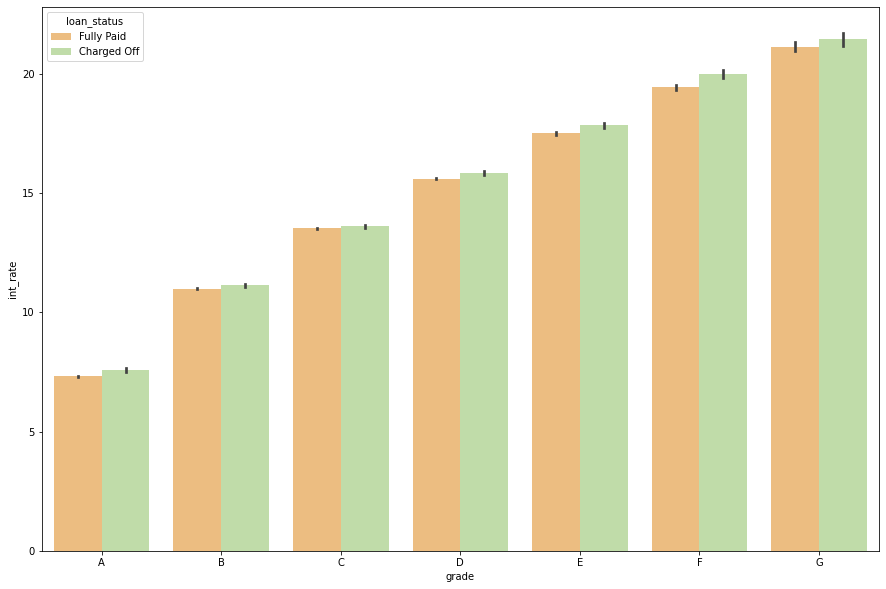

In [140]:
plt.figure(figsize=(15,10))
order = data['grade'].unique()
order.sort()
sns.barplot(data =data,x='grade', y='int_rate', order=order,  hue ='loan_status',palette="Spectral")
plt.show()

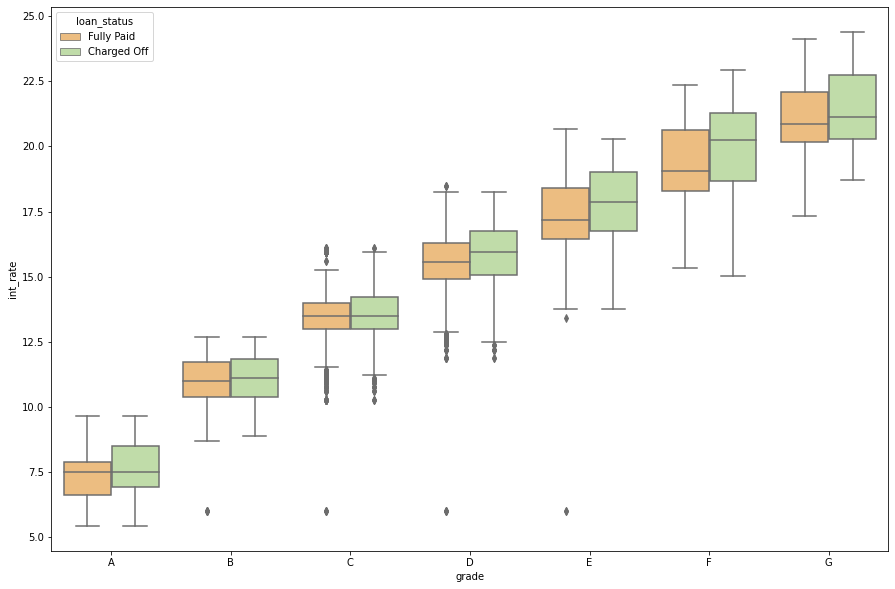

In [141]:
plt.figure(figsize=(15,10))
order = data['grade'].unique()
order.sort()
sns.boxplot(data =data,x='grade', y='int_rate',order=order, hue ='loan_status',palette="Spectral")
plt.show()

> Conclusion: 
> 1. Borrowers having good grade but higher intrerest rate could default the loan and gradually increasing for the grade over the interest rate

#### Grade and DTI

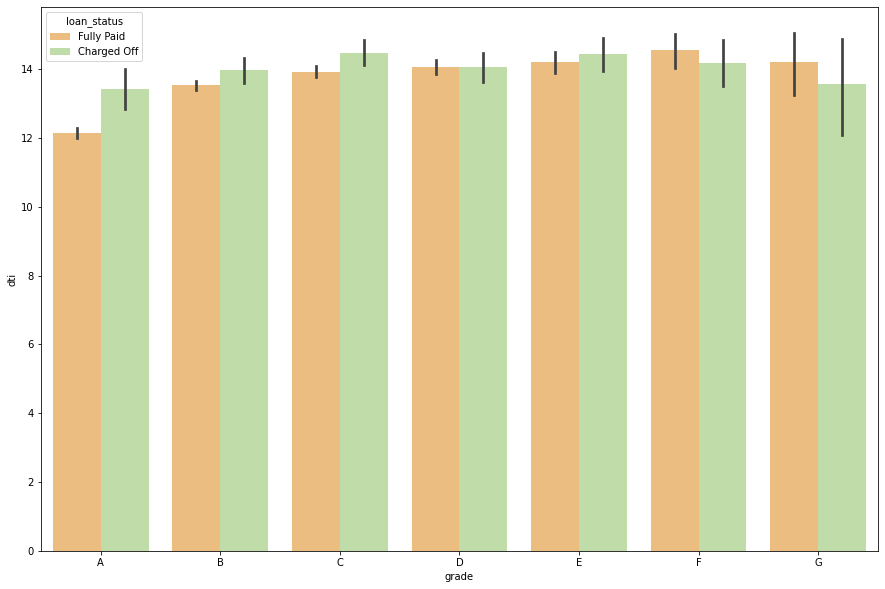

In [142]:
plt.figure(figsize=(15,10))
order = data['grade'].unique()
order.sort()
sns.barplot(data =data,x='grade', y='dti', order=order,  hue ='loan_status',palette="Spectral")
plt.show()

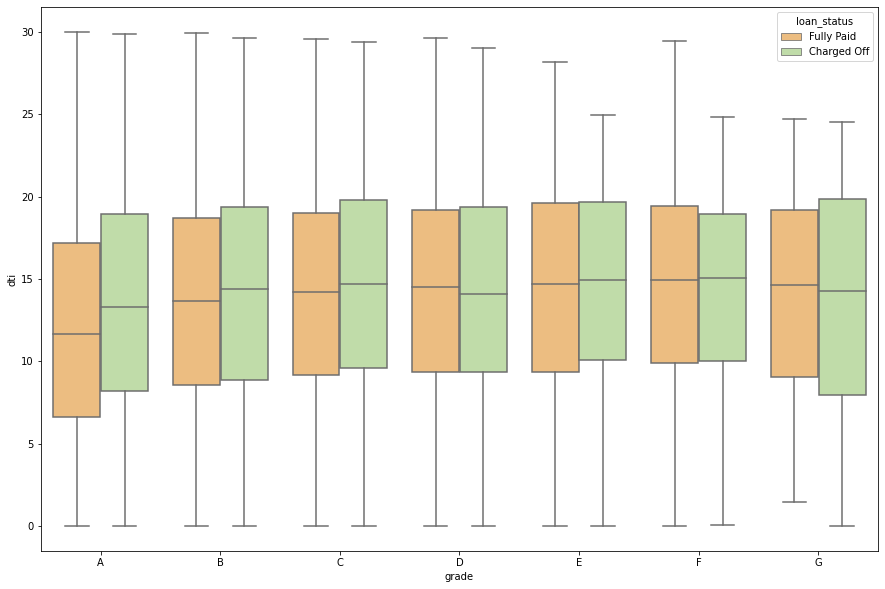

In [143]:
plt.figure(figsize=(15,10))
order = data['grade'].unique()
order.sort()
sns.boxplot(data =data,x='grade', y='dti', order=order,  hue ='loan_status',palette="Spectral")
plt.show()

> Conclusion: 
> 1. Borrowers having higher DTI but good grade, tend to default their loan

#### Loan Amount and Employment Length

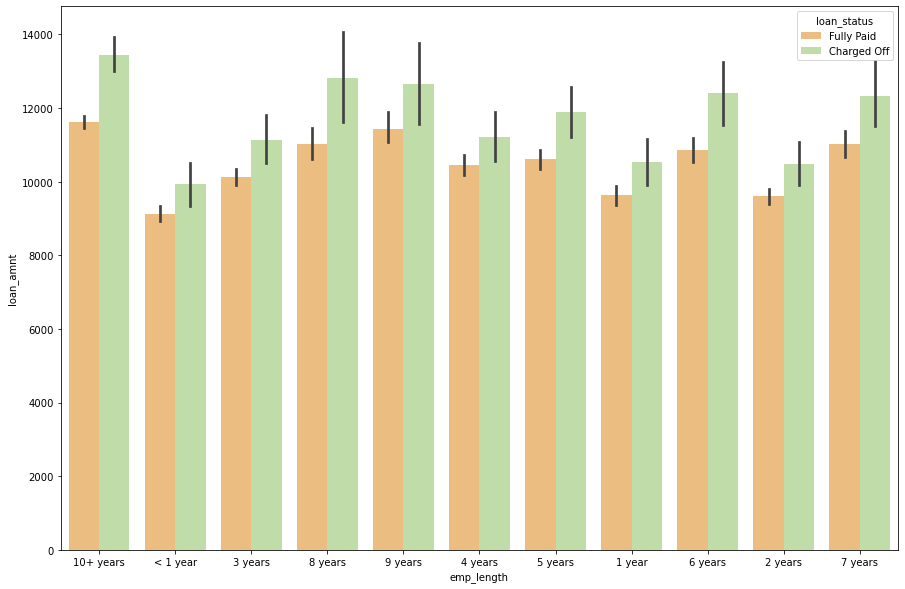

In [144]:
plt.figure(figsize=(15,10))
sns.barplot(data =data,x='emp_length', y='loan_amnt',  hue ='loan_status',palette="Spectral")
plt.show()

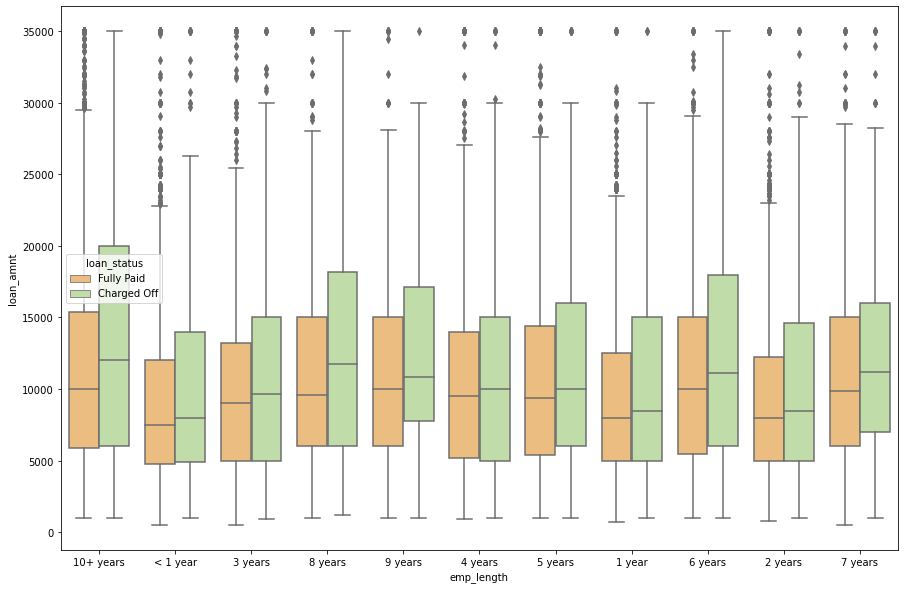

In [145]:
plt.figure(figsize=(15,10))
sns.boxplot(data =data,x='emp_length', y='loan_amnt',  hue ='loan_status',palette="Spectral")
plt.show()

> Conclusion: 
> 1. Borrowers having 10+ employment length and higher loan amount tend to default their loan

#### Loan Amount and Verification Status

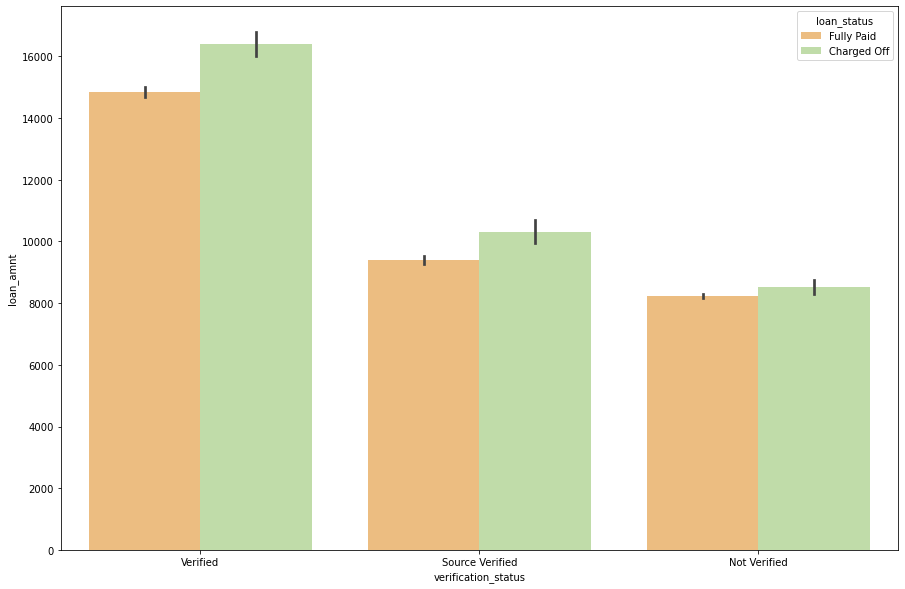

In [146]:
plt.figure(figsize=(15,10))
sns.barplot(data =data,x='verification_status', y='loan_amnt',  hue ='loan_status',palette="Spectral")
plt.show()

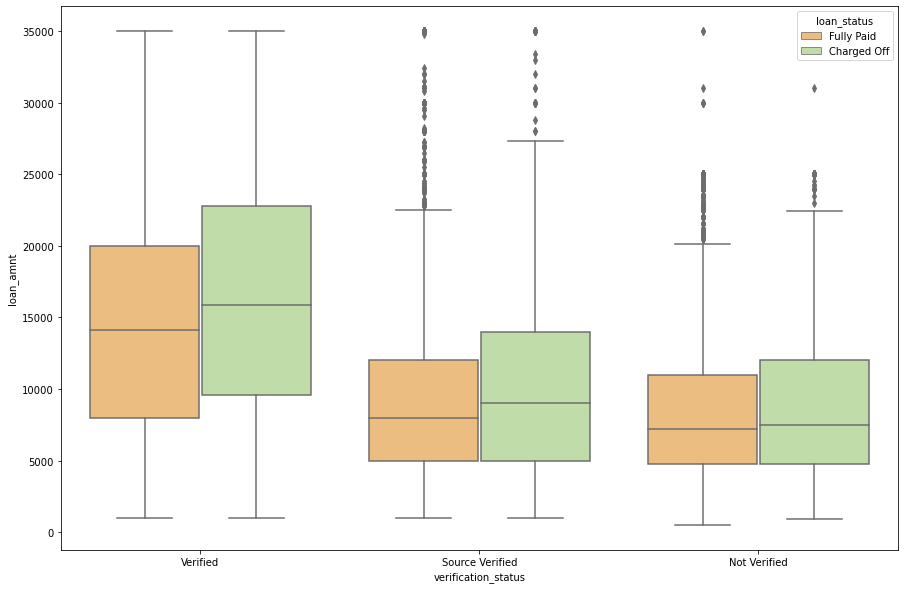

In [147]:
plt.figure(figsize=(15,10))
sns.boxplot(data =data,x='verification_status', y='loan_amnt',  hue ='loan_status',palette="Spectral")
plt.show()

> Conclusion: 
> 1. Borrowers having higher Loan amount tend to default their loan irrespective to the verification status

#### Loan Amount and Disbursement Year

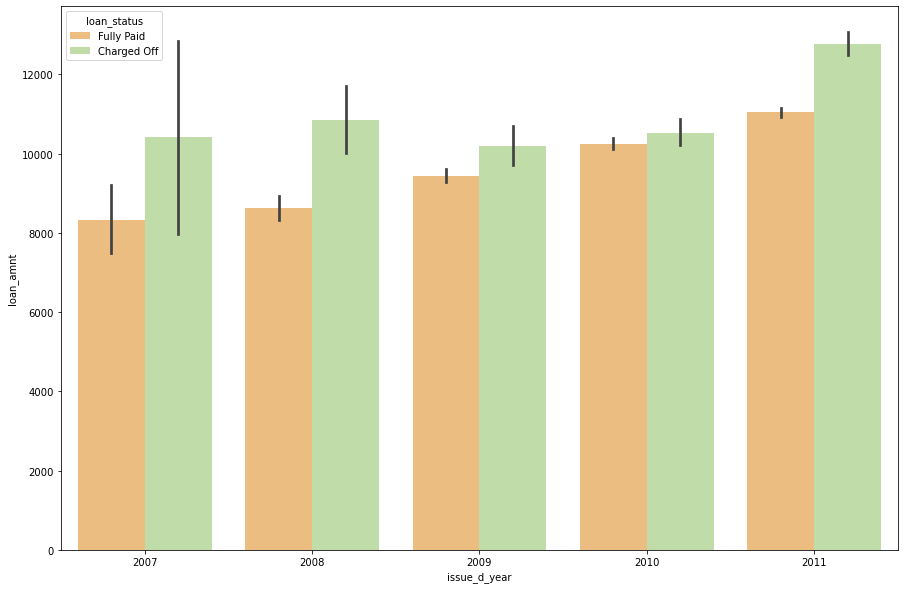

In [148]:
plt.figure(figsize=(15,10))
sns.barplot(data =data,x='issue_d_year', y='loan_amnt',  hue ='loan_status',palette="Spectral")
plt.show()

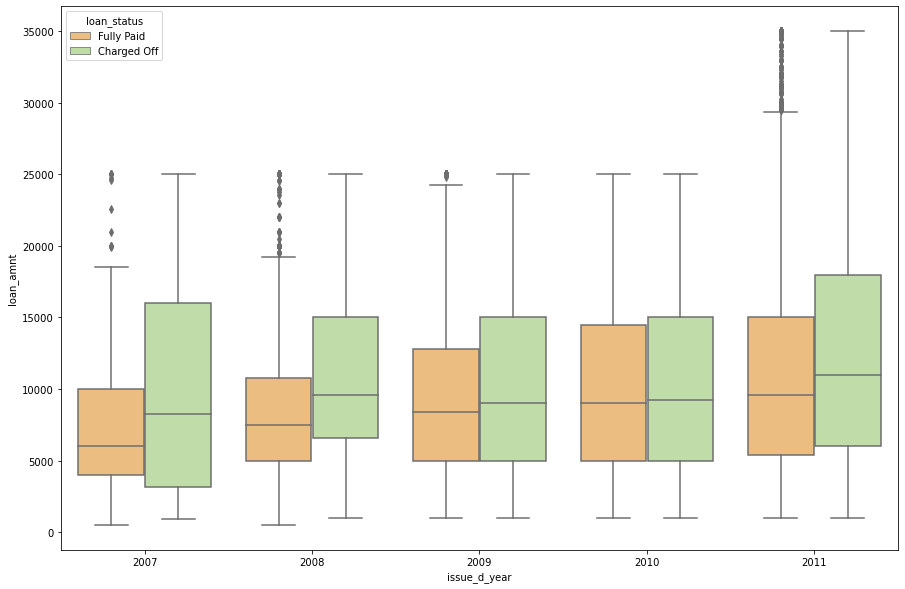

In [149]:
plt.figure(figsize=(15,10))
sns.boxplot(data =data,x='issue_d_year', y='loan_amnt',  hue ='loan_status',palette="Spectral")
plt.show()

> Conclusion: 
> 1. Borrowers having higher Loan amount tend to default their loan irrespective to the disbursement year

#### Loan Amount and Disbursement Month

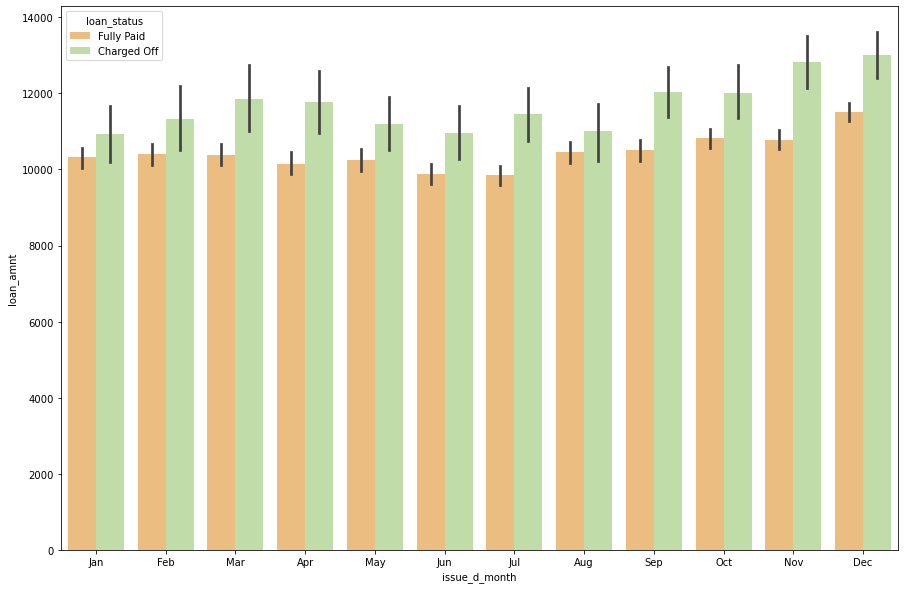

In [150]:
plt.figure(figsize=(15,10))
sns.barplot(data =data,x='issue_d_month', y='loan_amnt',order=date_order,  hue ='loan_status',palette="Spectral")
plt.show()

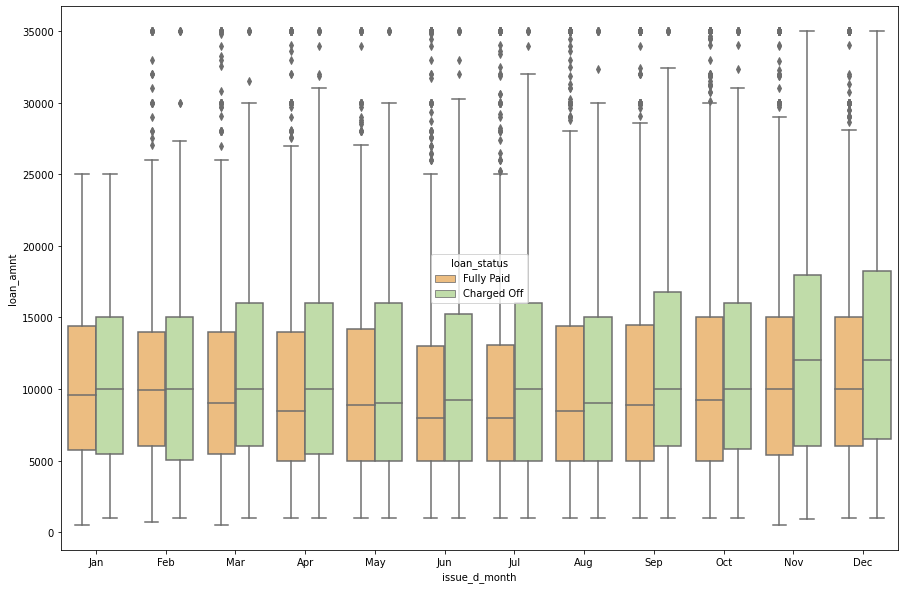

In [151]:
plt.figure(figsize=(15,10))
sns.boxplot(data =data,x='issue_d_month', y='loan_amnt',order=date_order,  hue ='loan_status',palette="Spectral")
plt.show()

> Conclusion: 
> 1. Borrowers having higher Loan amount tend to default their loan and higher when loan is provided in the end months of the year

### Correlation Matrix Data

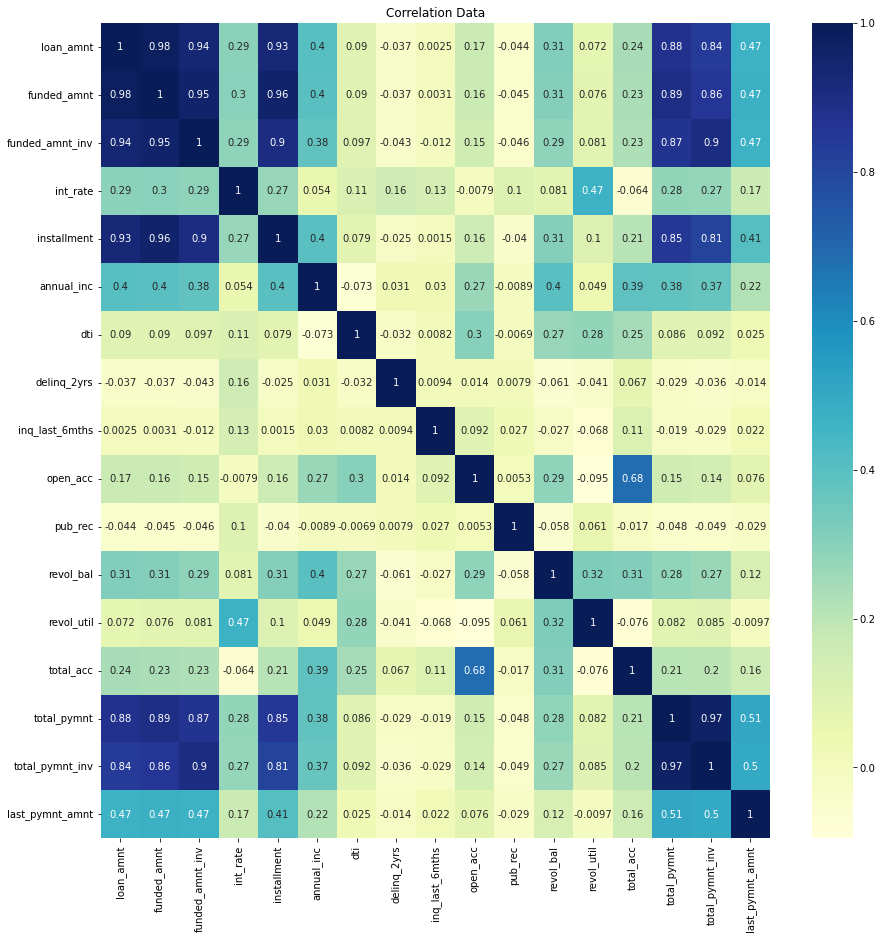

In [152]:
plt.figure(figsize=(15,15))
matrix = sns.heatmap(data.corr(), annot = True, cmap='YlGnBu')
plt.title("Correlation Data")
plt.show()

## Conclusion
> 1. Grade of the Borrower Impacts their credability, usually people with good grade don't default their loan
> 2. Interest Rate of the loan also matters the most, if the Interest rate is higher for the borrower, they are more likely to default their loan.
> 3. DTI of the borrower also make a huge impact, people having lower DTI are more likely to repay their loan than that of higher DTI
> 4. If people are taking loan with the purpose of loan reconsolidation or credit card or with other purpose, they are more likely to default their loan
> 5. Loan having repayment term of 60 months, are defaulted more compared to that of 36 months
> 6. People with higher income are less likely to default their loan